In [1]:
print("test")

test


In [2]:
import pandas as pd
from LabData.DataLoaders.GutMBLoader import GutMBLoader
from LabData.DataLoaders.SubjectLoader import SubjectLoader
from LabData.DataLoaders.DietLoggingLoader import DietLoggingLoader
from LabData.DataLoaders.LifeStyleLoader import LifeStyleLoader
from LabData.DataLoaders.BodyMeasuresLoader import BodyMeasuresLoader
from LabData.DataAnalyses.TenK_Trajectories.utils import get_diet_logging_around_stage
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import seaborn as sns

import pickle

In [3]:
stage = 'baseline' # 'baseline' or '02_00_visit'
calc_adherence = True
david = False
show = False

In [4]:
def explore_columns(df):
    for column in df.columns:
        print(column)
        print(df[column].value_counts())

## study_ids = [10, 1001, 1002]
study_ids = ["PNP3"]
subjects_dl = SubjectLoader()
subjects_data = subjects_dl.get_data(groupby_reg='first', study_ids=study_ids)
subjects_df = subjects_data.df

print(subjects_df["age"])

RegistrationCode  Date               
111527            2017-10-05 09:04:27    46.0
117111            2018-02-13 22:55:37    47.0
126092            2018-07-08 12:17:18    56.0
12752             2018-07-11 18:27:38    56.0
128811            2017-10-22 09:03:50    46.0
                                         ... 
988899            2017-09-12 18:55:41    36.0
991569            2017-10-23 15:47:35    51.0
992638            2017-05-09 15:01:09    53.0
997427            2018-12-16 14:32:00    53.0
997735            2018-11-10 20:19:55    46.0
Name: age, Length: 248, dtype: float64


## Load Diet Data

In [5]:
if stage == '02_00_visit':
    if not david:
        print("not david")
        with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/my_lists_diet.pkl', 'rb') as file:
            loaded_lists = pickle.load(file)
        base_features, all_diet_features = loaded_lists
    else:
        with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/david_colab/my_lists_diet.pkl', 'rb') as file:
            loaded_lists = pickle.load(file)
        base_features, all_diet_features = loaded_lists


In [6]:
with open('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/food_shortnames.pkl', 'rb') as file:
    food_shortnames = pickle.load(file)
food_shortnames

Index(['Acorn squash', 'Alfalfa sprouts', 'Almond Beverage', 'Almond flour',
       'Almond spread', 'Almonds', 'Amba', 'Apple', 'Apple Cake',
       'Apple Vinegar',
       ...
       'Yellow pepper', 'Yogurt', 'Zaatar', 'Zucchini', 'Zucchini Patties',
       'black pepper', 'dried tomato spread', 'emmer wheat bread', 'ginger',
       'kale'],
      dtype='object', name='shortname_eng', length=570)

In [7]:
list(food_shortnames)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [8]:
dll = DietLoggingLoader()
dlld = dll.get_data()
# log = get_diet_logging_around_stage(dlld.df, stage=stage, delta_before=2, delta_after=14)
# log = log.reset_index()
log = dlld.df.reset_index()
log = log.set_index(['RegistrationCode','Date','food_id'])
print(log.head(10))

                                              weight unit_id meal_type score
RegistrationCode Date                food_id                                
0                2013-12-31 09:46:00 9615     2418.0    21.0      Meal   NaN
                 2013-12-31 09:47:00 6520      136.0    21.0      Meal   NaN
                 2013-12-31 09:48:00 6520      136.0    21.0      Meal   NaN
                 2014-01-19 12:01:00 5024        1.0     NaN      Meal   NaN
                 2014-01-19 12:03:00 5173        1.0     NaN      Meal   NaN
                 2015-03-24 13:21:54 6436      112.0    21.0      Meal   NaN
                                     8060      144.0    41.0      Meal   NaN
                                     8085      142.0     1.0      Meal   NaN
                 2015-03-25 02:36:40 8058      114.0    41.0      Meal   NaN
                                     8637       55.0    37.0      Meal   NaN


In [9]:
yishay = pd.read_csv("/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/QC/DYsp/For_tomer/celiac_samples_metadata.csv")
yishay

,pair number,LV_code,Unnamed: 0,RegistrationCode,age,gender,bmi,Class
0,10K_1213119006,LV1016259536,12,10K_1213119006,55.0,0.0,25.075825,Celiac
1,10K_8021468422,LV1016269472,24,10K_8021468422,51.0,1.0,28.364197,Celiac
2,10K_5362832874,LV1016287092,31,10K_5362832874,44.0,0.0,19.096485,Celiac
3,10K_3985208029,LV1031610928,33,10K_3985208029,56.0,0.0,24.290466,Celiac
4,10K_8867932314,LV1016253075,35,10K_8867932314,51.0,0.0,21.557817,Celiac
...,...,...,...,...,...,...,...,...
91,10K_5082041780,LV1016279332,81,10K_5082041780,48.0,1.0,25.375584,Control
92,10K_4107304283,LV1016274586,82,10K_4107304283,49.0,0.0,22.726301,Control
93,10K_3228696123,LV1016260013,83,10K_3228696123,43.0,0.0,21.164478,Control
94,10K_5385945725,LV1003674940,84,10K_5385945725,44.0,0.0,22.862534,Control


In [10]:
def check_in_yishay(df):
    # Check if all registration codes in yishay are in log's index
    all_codes_present = yishay['RegistrationCode'].isin(df.index.get_level_values('RegistrationCode')).all()

    # Print the result
    print(f"All registration codes present: {all_codes_present}")

    # To see which ones might be missing, you can do:
    if not all_codes_present:
        missing_codes = yishay[~yishay['RegistrationCode'].isin(df.index.get_level_values('RegistrationCode'))]
        print("Missing registration codes:")
        print(missing_codes[['RegistrationCode', 'Class']].to_string(index=False))

check_in_yishay(log)

All registration codes present: True


In [11]:
# Get the unique registration codes from yishay
yishay_codes = yishay['RegistrationCode'].unique()

print(f"Original log shape: {log.shape}")
# Filter log to only include these registration codes
log = log.loc[log.index.get_level_values('RegistrationCode').isin(yishay_codes)]

# Check the shape of the original and filtered dataframes
print(f"Filtered log shape: {log.shape}")

# Optional: verify the filtering worked correctly
filtered_reg_codes = log.index.get_level_values('RegistrationCode').unique()
print(f"Number of unique registration codes in filtered log: {len(filtered_reg_codes)}")
print(f"Number of unique registration codes in yishay: {len(yishay_codes)}")

Original log shape: (13209078, 4)
Filtered log shape: (110735, 4)
Number of unique registration codes in filtered log: 96
Number of unique registration codes in yishay: 96


## Add Nutrients

In [12]:
# list(dll.food_nutrients.columns)

In [13]:
# nutr_list = list(dll.food_nutrients.columns)
# nutr_list = ['caffeine_mg','calcium_mg','carbohydrate_g',
# 'cholesterol_mg',
# 'energy_kcal',
# 'iron_mg',
# 'magnesium_mg',
# 'niacin_mg',
# 'phosphorus_mg',
# 'potassium_mg',
# 'protein_g',
# 'raevitamina_ug',
# 'riboflavin_mg',
# 'sodium_mg',
# 'thiamin_mg',
# 'totaldietaryfiber_g',
# 'totalfolate_ug',
# 'totallipid_g',
# 'totalmonounsaturatedfattyacids_g',
# 'totalpolyunsaturatedfattyacids_g',
# 'totalsaturatedfattyacids_g',
# 'vitaminb12_ug',
# 'vitaminb6_mg',
# 'vitaminc_mg',
# 'vitamind_iu',
# 'vitamine_mg',
# 'zinc_mg',
# 'alcohol_g']

# log_date = dll.add_nutrients(log, nutrient_list=nutr_list)
log_date = dll.add_new_nutrients(log)
log_date


weight unit_id meal_type score  \
RegistrationCode Date                food_id                                   
10K_1060368979   2021-02-28 07:45:00 1008191     1.0       3       NaN   NaN   
                                     1008281    35.0       1       NaN   NaN   
                                     1013615     4.0       3       NaN   NaN   
                 2021-02-28 09:30:00 1007294    40.0     nan       NaN   NaN   
                                     1007647    76.0      21       NaN   NaN   
...                                              ...     ...       ...   ...   
10K_9862170019   2024-07-07 20:13:00 1013473   320.0       1       NaN   NaN   
                 2024-07-08 08:52:00 1006814     6.0       3       NaN   NaN   
                                     1007502     2.0     nan       NaN   NaN   
                                     1008562    30.0       2       NaN   NaN   
                                     1008761    16.0      21       NaN   NaN   

                                                Protein  Total lipid (fat)  \
RegistrationCode Date                food_id                                 
10K_1060368979   2021-02-28 07:45:00 1008191   0.001200            0.00020   
                                     1008281   2.152500            0.43925   
                                     1013615   0.030667            0.00000   
                 2021-02-28 09:30:00 1007294   0.045333            0.07200   
                                     1007647   7.404933            2.74740   
...                                                 ...                ...   
10K_9862170019   2024-07-07 20:13:00 1013473  10.240000            3.20000   
                 2024-07-08 08:52:00 1006814   0.007200            0.00120   
                                     1007502   0.000000            0.00000   
                                     1008562   0.084000            0.29100   
                                     1008761   0.857600            3.66400   

                                              Carbohydrate, by difference  \
RegistrationCode Date                food_id                                
10K_1060368979   2021-02-28 07:45:00 1008191                     0.000000   
                                     1008281                    29.314249   
                                     1013615                     3.746133   
                 2021-02-28 09:30:00 1007294                     0.670667   
                                     1007647                    37.545268   
...                                                                   ...   
10K_9862170019   2024-07-07 20:13:00 1013473                   121.759998   
                 2024-07-08 08:52:00 1006814                     0.000000   
                                     1007502                     1.996000   
                                     1008562                     2.751000   
                                     1008761                    10.488000   

                                               Energy  Alcohol, ethyl  \
RegistrationCode Date                food_id                            
10K_1060368979   2021-02-28 07:45:00 1008191    0.010             0.0   
                                     1008281  131.075             0.0   
                                     1013615   14.760             0.0   
                 2021-02-28 09:30:00 1007294    3.600             0.0   
                                     1007647  205.960             0.0   
...                                               ...             ...   
10K_9862170019   2024-07-07 20:13:00 1013473  572.800             0.0   
                 2024-07-08 08:52:00 1006814    0.060             0.0   
                                     1007502    7.780             0.0   
                                     1008562   14.100             0.0   
                                     1008761   78.240             0.0   

                                      

In [14]:
nutr_list = log_date.columns[4:]
nutr_list

Index(['Protein', 'Total lipid (fat)', 'Carbohydrate, by difference', 'Energy',
       'Alcohol, ethyl', 'Water', 'Fiber, total dietary', 'Calcium, Ca',
       'Iron, Fe', 'Magnesium, Mg',
       ...
       'Vitamin B-12, added', 'Vitamin D (D2 + D3), International Units',
       'Vitamin D2 (ergocalciferol)', 'Vitamin D3 (cholecalciferol)',
       'Vitamin E, added', 'Vitamin K (Dihydrophylloquinone)',
       'Vitamin K (Menaquinone-4)', 'Vitamin K (phylloquinone)',
       'Sugars, total including NLEA', 'matched_food_score'],
      dtype='object', length=154)

In [15]:
vitamin_d_cols = [x for x in nutr_list if 'Vitamin D' in x]
vitamin_d_d2_d3_count = (log_date[vitamin_d_cols[0]] > 0).sum()
vitamin_d_international_units_count = (log_date[vitamin_d_cols[1]] > 0).sum()

if vitamin_d_d2_d3_count > vitamin_d_international_units_count:
    print("Vitamin D (D2 + D3) has more values above 0.")
else:
    print("Vitamin D (D2 + D3), International Units has more values above 0.")


Vitamin D (D2 + D3) has more values above 0.


In [16]:
# Unite similar features by summing them up
log_date['omega_6'] = log_date[['PUFA 18:2 n-6 c,c', 'PUFA 20:4 n-6', 'PUFA 18:2 CLAs', 'PUFA 18:2 i', 'PUFA 20:2 n-6 c,c', 'PUFA 2:4 n-6', 'PUFA 22:4', 'PUFA 18:3 n-6 c,c,c']].sum(axis=1)
log_date['omega_3'] = log_date[['PUFA 18:3 n-3 c,c,c (ALA)', 'PUFA 18:4', 'PUFA 20:5 n-3 (EPA)', 'PUFA 22:6 n-3 (DHA)', 'PUFA 22:5 n-3 (DPA)', 'PUFA 20:3 n-3']].sum(axis=1)
log_date['vitamin_E'] = log_date[['Vitamin E (alpha-tocopherol)', 'Tocopherol, beta', 'Tocopherol, delta', 'Tocopherol, gamma', 'Tocotrienol, alpha', 'Tocotrienol, beta', 'Tocotrienol, delta', 'Tocotrienol, gamma']].sum(axis=1)

# Drop the original columns after uniting
columns_to_drop = [
    'SFA 4:0', 'SFA 6:0', 'SFA 8:0', 'SFA 10:0', 'SFA 12:0', 'SFA 14:0', 'SFA 16:0', 'SFA 18:0', 'SFA 13:0', 'SFA 15:0', 'SFA 17:0', 'SFA 20:0', 'SFA 22:0', 'SFA 24:0',
    'MUFA 14:1', 'MUFA 15:1', 'MUFA 16:1', 'MUFA 17:1', 'MUFA 18:1', 'MUFA 18:1 c', 'MUFA 20:1', 'MUFA 22:1', 'MUFA 24:1 c', 'MUFA 16:1 c', 'MUFA 22:1 c', 'MUFA 18:1-11 t (18:1t n-7)',
    'PUFA 18:2 n-6 c,c', 'PUFA 20:4 n-6', 'PUFA 18:2 CLAs', 'PUFA 18:2 i', 'PUFA 20:2 n-6 c,c', 'PUFA 2:4 n-6', 'PUFA 22:4', 'PUFA 18:3 n-6 c,c,c',
    'PUFA 18:3 n-3 c,c,c (ALA)', 'PUFA 18:4', 'PUFA 20:5 n-3 (EPA)', 'PUFA 22:6 n-3 (DHA)', 'PUFA 22:5 n-3 (DPA)', 'PUFA 20:3 n-3',
    'TFA 16:1 t', 'TFA 18:1 t', 'TFA 18:2 t not further defined', 'TFA 18:2 t,t', 'TFA 22:1 t',
    'Vitamin A, IU', 'Carotene, beta', 'Retinol', 'Carotene, alpha', 'Cryptoxanthin, beta',
    'Vitamin D2 (ergocalciferol)', 'Vitamin D3 (cholecalciferol)', 'Vitamin D (D2 + D3), International Units', 
    'Vitamin K (Dihydrophylloquinone)', 'Vitamin K (Menaquinone-4)', 'Vitamin K (phylloquinone)',
    'Vitamin E (alpha-tocopherol)', 'Tocopherol, beta', 'Tocopherol, delta', 'Tocopherol, gamma', 'Tocotrienol, alpha', 'Tocotrienol, beta', 'Tocotrienol, delta', 'Tocotrienol, gamma', 'Vitamin E, added',
    'Folate, DFE', 'Sugars, total including NLEA',
    'Fatty acids, total trans-monoenoic', 'Fatty acids, total trans-polyenoic', 'Folate, DFE', 'Folate, food', 'Folic acid',
    'Galactose', 'Lactose', 'Maltose',  'PUFA 18:2', 'PUFA 18:3', 'PUFA 18:3i', 'PUFA 20:3', 'PUFA 20:4', 'PUFA 21:5',
    'Theobromine', 'Stigmasterol', 'Beta-sitosterol', 'Sucrose'
]

log_date.drop(columns=columns_to_drop, inplace=True)

# Optional: remove additional duplicates like 'Vitamin B-12, added' if needed
log_date.drop(columns=['Vitamin B-12, added'], inplace=True, errors='ignore')

# Ensure to keep only 'Folate, total'
log_date = log_date.loc[:, ~log_date.columns.duplicated()]


In [17]:
nutr_list = list(log_date.columns[4:])
nutr_list

['Protein',
 'Total lipid (fat)',
 'Carbohydrate, by difference',
 'Energy',
 'Alcohol, ethyl',
 'Water',
 'Fiber, total dietary',
 'Calcium, Ca',
 'Iron, Fe',
 'Magnesium, Mg',
 'Phosphorus, P',
 'Potassium, K',
 'Sodium, Na',
 'Zinc, Zn',
 'Copper, Cu',
 'Vitamin C, total ascorbic acid',
 'Thiamin',
 'Riboflavin',
 'Niacin',
 'Vitamin B-6',
 'Folate, total',
 'Vitamin B-12',
 'Cholesterol',
 'Fatty acids, total saturated',
 'Fatty acids, total monounsaturated',
 'Fatty acids, total polyunsaturated',
 'Vitamin D (D2 + D3)',
 'Sugars, Total',
 'Fatty acids, total trans',
 'Vitamin A, RAE',
 'Isoleucine',
 'Leucine',
 'Valine',
 'Lysine',
 'Threonine',
 'Methionine',
 'Phenylalanine',
 'Tryptophan',
 'Histidine',
 'Tyrosine',
 'Arginine',
 'Cystine',
 'Serine',
 'Pantothenic acid',
 'Selenium, Se',
 'Choline, total',
 'Manganese, Mn',
 'Fructose',
 'Vitamin K',
 'Iodine',
 'Sugar alcohols',
 'Biotin',
 'Alanine',
 'Ash',
 'Aspartic acid',
 'Betaine',
 'Caffeine',
 'Campesterol',
 'Fluor

In [18]:
# corr_matrix = log_date[log_date.columns[4:]].corr()

In [19]:
# high_corr_pairs = corr_matrix[(np.abs(corr_matrix) > 0.9) & (corr_matrix != 1.0)]

# # Step 3: Unstack and filter to get pairs of features with correlation > 0.8
# high_corr_pairs = high_corr_pairs.unstack().dropna()

# # Since the matrix is symmetric, we need to filter out duplicates
# high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

# # Display the high correlation pairs
# pd.set_option('display.max_rows', None)
# high_corr_pairs

In [20]:
pd.reset_option('display.max_rows')

## Filter Foods Log

In [21]:
log_date = dll.add_short_food_names(log_date)
log_date = dll.add_food_categories(log_date)
log_date

weight unit_id meal_type score  \
RegistrationCode Date                food_id                                   
10K_1060368979   2021-02-28 07:45:00 1008191     1.0       3       NaN   NaN   
                                     1008281    35.0       1       NaN   NaN   
                                     1013615     4.0       3       NaN   NaN   
                 2021-02-28 09:30:00 1007294    40.0     nan       NaN   NaN   
                                     1007647    76.0      21       NaN   NaN   
...                                              ...     ...       ...   ...   
10K_9862170019   2024-07-07 20:13:00 1013473   320.0       1       NaN   NaN   
                 2024-07-08 08:52:00 1006814     6.0       3       NaN   NaN   
                                     1007502     2.0     nan       NaN   NaN   
                                     1008562    30.0       2       NaN   NaN   
                                     1008761    16.0      21       NaN   NaN   

                                                Protein  Total lipid (fat)  \
RegistrationCode Date                food_id                                 
10K_1060368979   2021-02-28 07:45:00 1008191   0.001200            0.00020   
                                     1008281   2.152500            0.43925   
                                     1013615   0.030667            0.00000   
                 2021-02-28 09:30:00 1007294   0.045333            0.07200   
                                     1007647   7.404933            2.74740   
...                                                 ...                ...   
10K_9862170019   2024-07-07 20:13:00 1013473  10.240000            3.20000   
                 2024-07-08 08:52:00 1006814   0.007200            0.00120   
                                     1007502   0.000000            0.00000   
                                     1008562   0.084000            0.29100   
                                     1008761   0.857600            3.66400   

                                              Carbohydrate, by difference  \
RegistrationCode Date                food_id                                
10K_1060368979   2021-02-28 07:45:00 1008191                     0.000000   
                                     1008281                    29.314249   
                                     1013615                     3.746133   
                 2021-02-28 09:30:00 1007294                     0.670667   
                                     1007647                    37.545268   
...                                                                   ...   
10K_9862170019   2024-07-07 20:13:00 1013473                   121.759998   
                 2024-07-08 08:52:00 1006814                     0.000000   
                                     1007502                     1.996000   
                                     1008562                     2.751000   
                                     1008761                    10.488000   

                                               Energy  Alcohol, ethyl  \
RegistrationCode Date                food_id                            
10K_1060368979   2021-02-28 07:45:00 1008191    0.010             0.0   
                                     1008281  131.075             0.0   
                                     1013615   14.760             0.0   
                 2021-02-28 09:30:00 1007294    3.600             0.0   
                                     1007647  205.960             0.0   
...                                               ...             ...   
10K_9862170019   2024-07-07 20:13:00 1013473  572.800             0.0   
                 2024-07-08 08:52:00 1006814    0.060             0.0   
                                     1007502    7.780             0.0   
                                     1008562   14.100             0.0   
                                     1008761   78.240             0.0   

                                      

In [22]:
log_date = log_date.reset_index()
log_date['Day'] = log_date['Date'].astype(str).str[:10]
log_date['Hour'] = log_date['Date'].astype(str).str[10:16]
log_date.drop('Date', axis=1, inplace=True)
log_date = log_date.set_index(['RegistrationCode','Day','Hour','food_id'])
print(log_date.head())

                                            weight unit_id meal_type score  \
RegistrationCode Day        Hour   food_id                                   
10K_1060368979   2021-02-28  07:45 1008191     1.0       3       NaN   NaN   
                                   1008281    35.0       1       NaN   NaN   
                                   1013615     4.0       3       NaN   NaN   
                             09:30 1007294    40.0     nan       NaN   NaN   
                                   1007647    76.0      21       NaN   NaN   

                                             Protein  Total lipid (fat)  \
RegistrationCode Day        Hour   food_id                                
10K_1060368979   2021-02-28  07:45 1008191  0.001200            0.00020   
                                   1008281  2.152500            0.43925   
                                   1013615  0.030667            0.00000   
                             09:30 1007294  0.045333            0.07200   
   

In [23]:
# Filter all entries with NaN shortname or Energy
log_date = log_date[~log_date['shortname_eng'].isna()]
log_date = log_date[~log_date['Energy'].isna()]
log_date.shape

(99649, 83)

In [24]:
# Filter foods that are not present in >1% of the cohort
log_date = log_date[log_date['shortname_eng'].isin(food_shortnames)]
log_date.shape

(98298, 83)

In [25]:
# Filter foods that have no nutrient data, other than sugar substitutes
# Filter rows where all nutrient values are 0
log_date = log_date[~((log_date[nutr_list] == 0).all(axis=1) & (log_date['shortname_eng'] != "Sugar substitute"))]
log_date.shape

(98298, 83)

In [26]:
# Filter Poppy seed cake and Salep, which have incorrect nutrient data
log_date = log_date[~log_date['shortname_eng'].isin(["Poppy seed cake", "Salep"])]
# Filter taster's choice which has calories inconsistent with other coffee types
log_date = log_date[~log_date['name'].str.contains("Tasters")]
log_date.shape

(94860, 83)

In [27]:
check_in_yishay(log_date)

All registration codes present: True


In [28]:
# Filter Halva entries with incorrect nutrient data
log_date = log_date[~((log_date['shortname_eng'] == "Halva") & (log_date['Total lipid (fat)'] == 0))]
log_date.shape

(94854, 83)

In [29]:
# Filter unrealistic energy values
log_date = log_date[(log_date["Energy"] >= 0) & (log_date["Energy"] < 3000)]
log_date.shape

(94844, 83)

In [30]:
# Filter unrealistic weight values
log_date = log_date[(log_date["weight"] >= 0) & (log_date["weight"] < 2400)]
log_date.shape

(94842, 83)

In [31]:
# Filter duplicate entries
log_date_reset = log_date.reset_index()
log_date = log_date_reset[
    ~log_date_reset.duplicated(subset=['RegistrationCode', 'Day', 'food_id', 'Hour', 'weight'], keep='first')
].set_index(['RegistrationCode', 'Day', 'food_id', 'Hour'])
log_date.shape

(94842, 83)

In [32]:
check_in_yishay(log_date)

All registration codes present: True


In [33]:
# Filter foods without NOVA food scores
NOVA = pd.read_excel('/net/mraid20/export/genie/LabData/Data/10K/foods/processed_foods_mappingV4.xlsx').rename(columns = {'foodid 10k':'food_id'}).dropna(subset=['Score'])
NOVA

,% of calories,food_id,Score,Unnamed: 3,Name 10k,D2ID,Unnamed: 6
0,1.443412,1010363.0,1.0,NaN,סלט ירקות עם שמן זית,75145088,סלט ירקות עם שמן זית
1,1.251932,1012524.0,1.0,NaN,בננה,NaN,NaN
2,1.204728,1013302.0,3.0,NaN,פיתה,NaN,NaN
3,1.043617,1011117.0,1.0,NaN,אבוקדו,63105010,אבוקדו
4,1.002832,1010403.0,1.0,NaN,אורז לבן מבושל,NaN,NaN
...,...,...,...,...,...,...,...
7981,NaN,1014947.0,4.0,NaN,חטיף פיטנס פירות יער,NaN,NaN
7982,NaN,1014948.0,4.0,NaN,יוגורט דנונה פרו 20 קרמל מלוח 0%,NaN,NaN
7983,NaN,1014949.0,4.0,NaN,פילה סויה ענק סוי ג'וי מבושל במים,NaN,NaN
7984,NaN,1014950.0,3.0,NaN,שניצל ללא גלוטן מאמא עוף,NaN,NaN


In [34]:
NOVA['food_id'] = NOVA['food_id'].astype(int).astype(str)
log_date_reset = log_date.reset_index()
merged_df = log_date_reset.merge(NOVA[['food_id', 'Score']], on='food_id', how='left')
log_date = merged_df.set_index(log_date.index.names)
log_date = log_date.dropna(subset=['Score'])
log_date.shape

(94825, 84)

In [35]:
before_any_filters = log_date.reset_index()["RegistrationCode"].nunique()
before_any_filters

96

In [36]:
# Filter logging days with <500 calories or >4000 calories

total_energy_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].transform('sum')
log_date['total_energy_per_day'] = total_energy_per_day
log_date = log_date[(log_date['total_energy_per_day'] >= 500) & (log_date['total_energy_per_day'] <= 4000)]
log_date.shape

(93104, 85)

In [37]:
# log_date.reset_index()["RegistrationCode"].nunique()

In [38]:
# Validate filtering
log_date.groupby(['RegistrationCode', 'Day'])['Energy'].transform('sum').describe()

count    93104.000000
mean      1571.448086
std        545.711798
min        501.450000
25%       1199.255451
50%       1474.218805
75%       1872.007499
max       3983.814987
Name: Energy, dtype: float64

In [39]:
# log_date.reset_index()["RegistrationCode"].nunique()

In [40]:
check_in_yishay(log_date)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_2455355185 Celiac


In [41]:
# Filter People with less than 3 days of diet documentation.
# Group by RegistrationCode and count the number of unique days using the index level 'Day'
unique_day_counts = log_date.groupby('RegistrationCode').apply(lambda x: x.index.get_level_values('Day').nunique())

# Filter out RegistrationCodes with less than 3 unique days
valid_registration_codes = unique_day_counts[unique_day_counts >= 3].index

# Create a new DataFrame with only the valid RegistrationCodes
log_date = log_date.loc[valid_registration_codes]

# Display the filtered DataFrame
print(log_date.shape)


(93104, 85)


In [42]:
check_in_yishay(log_date)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_2455355185 Celiac


In [43]:
people_more_than_3 = log_date.reset_index()["RegistrationCode"].nunique()
people_more_than_3

95

In [44]:
people_more_than_8 = log_date.reset_index()["RegistrationCode"].nunique()
people_more_than_8

95

In [45]:
before_any_filters

96

In [46]:
unique_day_counts

RegistrationCode
10K_1060368979     48
10K_1197934845     35
10K_1210197986     14
10K_1213119006     39
10K_1280653108     22
                 ... 
10K_9696484969    808
10K_9703851292     24
10K_9790043612     23
10K_9794505620     30
10K_9862170019     34
Length: 95, dtype: int64

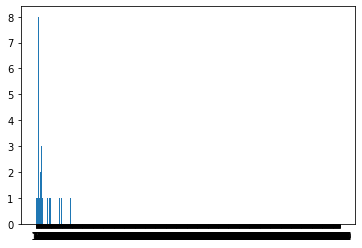

In [47]:
import matplotlib.pyplot as plt

plt.hist(unique_day_counts, bins=range(1, unique_day_counts.max()+2))
plt.xticks(range(1, unique_day_counts.max()+1))
plt.show()


In [48]:
exact_7_days = (unique_day_counts == 7).sum()
more_than_14_days = (unique_day_counts >= 14).sum()
less_than_14_days = ((unique_day_counts < 14) & (unique_day_counts > 7)).sum()

print(f"Number of unique_day_counts with exactly 7 days: {exact_7_days}")
print(f"Number of unique_day_counts with 14 or more days: {more_than_14_days}")
print(f"Number of unique_day_counts with less than 14 days: {less_than_14_days}")


Number of unique_day_counts with exactly 7 days: 0
Number of unique_day_counts with 14 or more days: 85
Number of unique_day_counts with less than 14 days: 8


In [49]:
days_saved = ((unique_day_counts < 8) & (unique_day_counts >= 3)).sum()

print(f"Number of unique_day_counts with 4<=x<=7 days: {days_saved}")


Number of unique_day_counts with 4<=x<=7 days: 2


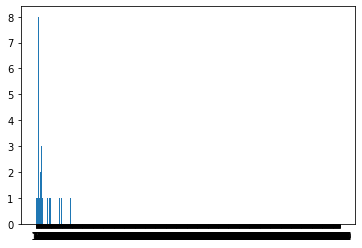

In [50]:
# validate filtering:
# Group by RegistrationCode and count the number of unique days using the index level 'Day'
unique_day_counts_after = log_date.groupby('RegistrationCode').apply(lambda x: x.index.get_level_values('Day').nunique())
plt.hist(unique_day_counts_after, bins=range(1, unique_day_counts_after.max()+2))
plt.xticks(range(1, unique_day_counts_after.max()+1))
plt.show()

In [51]:
# # Validate filtering:
# # Group by RegistrationCode and count the number of unique days using the 'Date' index level
# unique_day_counts_after = log_date.groupby('RegistrationCode').apply(
#     lambda x: pd.to_datetime(x.index.get_level_values('Date')).normalize().nunique()
# )

# # Plot histogram of the unique day counts
# plt.hist(unique_day_counts_after, bins=range(1, unique_day_counts_after.max() + 2))
# plt.xticks(range(1, unique_day_counts_after.max() + 1))
# plt.show()


In [52]:
log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().describe()
# max_calories_registration_code = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().idxmax()[0]
# print(max_calories_registration_code)


count    6116.000000
mean     1480.219766
std       541.026052
min       501.450000
25%      1107.838103
50%      1389.606792
75%      1760.948017
max      3983.814987
Name: Energy, dtype: float64

In [53]:
# Filter outlier days that might be under-documentation. Filtering is done in log_day downstream

# Assuming `log_date` is your DataFrame
# Calculating energy per day
log_date_energy_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().reset_index()

# Grouping by RegistrationCode to calculate mean and std
stats = log_date_energy_per_day.groupby('RegistrationCode')['Energy'].agg(['mean', 'std'])

# Merging stats back to a new DataFrame
log_date_with_stats = log_date_energy_per_day.merge(stats, on='RegistrationCode')

# Defining outliers: Energy values outside mean ± 2*std
log_date_with_stats['is_outlier_below'] = (log_date_with_stats['Energy'] < (log_date_with_stats['mean'] - 2.5 * log_date_with_stats['std'])) #| \
                                    #(log_date_with_stats['Energy'] > (log_date_with_stats['mean'] + 2 * log_date_with_stats['std']))

# Filtering outlier days
# outliers = log_date_with_stats[log_date_with_stats['is_outlier']][['RegistrationCode', 'Day', 'Energy', 'is_outlier']]
outliers = log_date_with_stats[log_date_with_stats['is_outlier_below']][['RegistrationCode', 'Day', 'Energy', 'is_outlier_below']]

# Display the outliers
print(outliers)
# print(log_date_with_stats[log_date_with_stats['RegistrationCode'] == '10K_1455707672'])


     RegistrationCode         Day      Energy  is_outlier_below
39     10K_1060368979  2023-03-18  669.765000              True
547    10K_3151471936  2020-06-23  504.470000              True
4440   10K_7503628975  2025-07-05  729.619000              True
4649   10K_8033721579  2021-11-16  558.455000              True
5256   10K_9696484969  2023-06-06  536.946431              True
5379   10K_9696484969  2023-10-07  564.809993              True


In [54]:
# Filter outlier days
log_date = log_date[~log_date_with_stats.set_index(['RegistrationCode', 'Day'])['is_outlier_below']]
log_date.shape

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(93057, 85)

In [55]:
check_in_yishay(log_date)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_2455355185 Celiac


In [56]:
log_date

weight unit_id meal_type score  \
RegistrationCode Day        food_id Hour                                     
10K_1060368979   2021-02-28 1008191  07:45     1.0       3       NaN   NaN   
                            1008281  07:45    35.0       1       NaN   NaN   
                            1013615  07:45     4.0       3       NaN   NaN   
                            1007294  09:30    40.0     nan       NaN   NaN   
                            1007647  09:30    76.0      21       NaN   NaN   
...                                            ...     ...       ...   ...   
10K_9862170019   2024-07-07 1010266  13:35   382.0      21       NaN   NaN   
                            1008878  17:36   300.0      41       NaN   NaN   
                            1010363  17:36   300.0      48       NaN   NaN   
                            1007889  20:13    11.0       2       NaN   NaN   
                            1008878  20:13   300.0      41       NaN   NaN   

                                              Protein  Total lipid (fat)  \
RegistrationCode Day        food_id Hour                                   
10K_1060368979   2021-02-28 1008191  07:45   0.001200           0.000200   
                            1008281  07:45   2.152500           0.439250   
                            1013615  07:45   0.030667           0.000000   
                            1007294  09:30   0.045333           0.072000   
                            1007647  09:30   7.404933           2.747400   
...                                               ...                ...   
10K_9862170019   2024-07-07 1010266  13:35  46.603999          44.312001   
                            1008878  17:36  65.399998          45.000000   
                            1010363  17:36   2.400000           7.200000   
                            1007889  20:13   0.929225           0.048125   
                            1008878  20:13  65.399998          45.000000   

                                            Carbohydrate, by difference  \
RegistrationCode Day        food_id Hour                                  
10K_1060368979   2021-02-28 1008191  07:45                     0.000000   
                            1008281  07:45                    29.314249   
                            1013615  07:45                     3.746133   
                            1007294  09:30                     0.670667   
                            1007647  09:30                    37.545268   
...                                                                 ...   
10K_9862170019   2024-07-07 1010266  13:35                   124.531994   
                            1008878  17:36                    21.420000   
                            1010363  17:36                     9.300000   
                            1007889  20:13                     0.639925   
                            1008878  20:13                    21.420000   

                                              Energy  Alcohol, ethyl  \
RegistrationCode Day        food_id Hour                               
10K_1060368979   2021-02-28 1008191  07:45     0.010             0.0   
                            1008281  07:45   131.075             0.0   
                            1013615  07:45    14.760             0.0   
                            1007294  09:30     3.600             0.0   
                            1007647  09:30   205.960             0.0   
...                                              ...             ...   
10K_9862170019   2024-07-07 1010266  13:35  1081.060             0.0   
                            1008878  17:36   753.000             0.0   
                            1010363  17:36   120.000             0.0   
                            1007889  20:13     6.215             0.0   
                            1008878  20:13   753.000             0.0   

                                                 Water  ...  vitamin_E  \
RegistrationCode Day        food_id Hour             

In [57]:
log_date.head()

weight unit_id meal_type score  \
RegistrationCode Day        food_id Hour                                     
10K_1060368979   2021-02-28 1008191  07:45     1.0       3       NaN   NaN   
                            1008281  07:45    35.0       1       NaN   NaN   
                            1013615  07:45     4.0       3       NaN   NaN   
                            1007294  09:30    40.0     nan       NaN   NaN   
                            1007647  09:30    76.0      21       NaN   NaN   

                                             Protein  Total lipid (fat)  \
RegistrationCode Day        food_id Hour                                  
10K_1060368979   2021-02-28 1008191  07:45  0.001200            0.00020   
                            1008281  07:45  2.152500            0.43925   
                            1013615  07:45  0.030667            0.00000   
                            1007294  09:30  0.045333            0.07200   
                            1007647  09:30  7.404933            2.74740   

                                            Carbohydrate, by difference  \
RegistrationCode Day        food_id Hour                                  
10K_1060368979   2021-02-28 1008191  07:45                     0.000000   
                            1008281  07:45                    29.314249   
                            1013615  07:45                     3.746133   
                            1007294  09:30                     0.670667   
                            1007647  09:30                    37.545268   

                                             Energy  Alcohol, ethyl  \
RegistrationCode Day        food_id Hour                              
10K_1060368979   2021-02-28 1008191  07:45    0.010             0.0   
                            1008281  07:45  131.075             0.0   
                            1013615  07:45   14.760             0.0   
                            1007294  09:30    3.600             0.0   
                            1007647  09:30  205.960             0.0   

                                                Water  ...  vitamin_E  \
RegistrationCode Day        food_id Hour               ...              
10K_1060368979   2021-02-28 1008191  07:45   0.994000  ...   0.000200   
                            1008281  07:45   2.346750  ...   0.204750   
                            1013615  07:45   0.157600  ...   0.385200   
                            1007294  09:30  39.120001  ...   0.006667   
                            1007647  09:30  26.549334  ...   2.594133   

                                            shortname_heb  shortname_eng  \
RegistrationCode Day        food_id Hour                                   
10K_1060368979   2021-02-28 1008191  07:45            קפה         Coffee   
                            1008281  07:45      דגני בוקר        Cereals   
                            1013615  07:45       סוכר חום    Brown Sugar   
                            1007294  09:30            קפה         Coffee   
                            1007647  09:30         לחמניה           Roll   

                                            FoodCategoryID  \
RegistrationCode Day        food_id Hour                     
10K_1060368979   2021-02-28 1008191  07:45            41.0   
                            1008281  07:45            35.0   
                            1013615  07:45            29.0   
                            1007294  09:30            41.0   
                            1007647  09:30           133.0   

                                                               name  \
RegistrationCode Day        food_id Hour                              
10K_1060368979   2021-02-28 1008191  07:45               קפה מגורען   
                            1008281  07:45  דגני בוקר קורנפלקס תלמה   
                            1013615  07:45                 סוכר חום   
                            1007294  09:30               קפה אספרסו   
                            1007647  09:3

In [58]:
# A function to view a specific RegistrationCode's diet log

def peek_at_day(log_date, registration_code, day, additional_cols=[]):
    # Filter the DataFrame for the specific RegistrationCode and Day
    filtered_log_date = log_date.loc[(registration_code, day)]

    # Select only the desired columns
    filtered_log_date = filtered_log_date[['shortname_eng', 'Energy'] + additional_cols]

    # Display the resulting DataFrame
    return filtered_log_date


def peek_at_person(log_date, registration_code, additional_cols=[]):
    pd.set_option('display.max_rows', None)
    # Filter the DataFrame for the specific RegistrationCode
    filtered_log_date = log_date.loc[registration_code]

    # Select only the desired columns
    filtered_log_date = filtered_log_date[['shortname_eng', 'Energy'] + additional_cols]

    # Display the resulting DataFrame
    return filtered_log_date

# peek_at_day(log_date, '10K_1000942861')


In [59]:
# max_registration_code = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().idxmax()[0]
# min_registration_code = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].sum().idxmin()[0]

In [60]:
# peek_at_day(log_date, max_registration_code)

In [61]:
# peek_at_day(log_date, min_registration_code)

In [62]:
pd.reset_option('display.max_rows')

## Add Food Patterns

In [63]:
log_date['total_energy_per_day']

RegistrationCode  Day         food_id  Hour  
10K_1060368979    2021-02-28  1008191   07:45    1083.811785
                              1008281   07:45    1083.811785
                              1013615   07:45    1083.811785
                              1007294   09:30    1083.811785
                              1007647   09:30    1083.811785
                                                    ...     
10K_9862170019    2024-07-07  1010266   13:35    2895.055000
                              1008878   17:36    2895.055000
                              1010363   17:36    2895.055000
                              1007889   20:13    2895.055000
                              1008878   20:13    2895.055000
Name: total_energy_per_day, Length: 93057, dtype: float64

In [64]:
nutr_list_no_energy = [nutrient for nutrient in nutr_list if nutrient != "Energy"]
relative_nutrients = log_date[nutr_list_no_energy].div(log_date['total_energy_per_day'], axis=0)

In [65]:
log_date[nutr_list_no_energy] = relative_nutrients

In [66]:
foods_per_meal = log_date.reset_index().groupby(['RegistrationCode', 'Day', 'Hour'])['food_id'].count()
# foods_per_meal = foods_per_meal.reset_index().groupby(['RegistrationCode', "Day"]).mean()
foods_per_meal = foods_per_meal.reset_index().drop('Hour', axis=1).groupby(['RegistrationCode', "Day"]).mean()
foods_per_meal

food_id
RegistrationCode Day                
10K_1060368979   2021-02-28    2.125
                 2021-03-01    2.000
                 2021-03-02    2.375
                 2021-03-03    3.000
                 2021-03-04    3.000
...                              ...
10K_9862170019   2024-07-02    3.000
                 2024-07-03    1.750
                 2024-07-05    2.250
                 2024-07-06    2.200
                 2024-07-07    2.500

[6110 rows x 1 columns]

In [67]:
foods_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['food_id'].nunique()
foods_per_day

RegistrationCode  Day       
10K_1060368979    2021-02-28    14
                  2021-03-01    13
                  2021-03-02    13
                  2021-03-03    13
                  2021-03-04    11
                                ..
10K_9862170019    2024-07-02    13
                  2024-07-03     7
                  2024-07-05     9
                  2024-07-06    11
                  2024-07-07     9
Name: food_id, Length: 6110, dtype: int64

In [68]:
meals_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['Hour'].unique().apply(lambda x : len(x))
meals_per_day

RegistrationCode  Day       
10K_1060368979    2021-02-28    8
                  2021-03-01    8
                  2021-03-02    8
                  2021-03-03    6
                  2021-03-04    5
                               ..
10K_9862170019    2024-07-02    6
                  2024-07-03    4
                  2024-07-05    4
                  2024-07-06    5
                  2024-07-07    4
Name: Hour, Length: 6110, dtype: int64

In [69]:
# Create diet entropy feature
# Step 1: Reset index to access 'Day' and 'energy'
log_date_reset = log_date.reset_index()

# Step 2: Calculate calorie-based proportions and Shannon's diversity for each RegistrationCode and Day
def shannon_entropy_by_calories(group):
    # Sum the calories of each shortname_eng
    food_calories = group.groupby('shortname_eng')['Energy'].sum()
    # Calculate proportions based on total daily energy
    proportions = food_calories / group['total_energy_per_day'].iloc[0]  # Use total daily energy
    # Calculate Shannon entropy
    entropy = -np.sum(proportions * np.log(proportions))
    return entropy

# Apply the entropy calculation for each (RegistrationCode, Day) group
shannon_per_day = log_date_reset.groupby(['RegistrationCode', 'Day']).apply(shannon_entropy_by_calories).rename('diet_entropy_calories')

shannon_per_day

/home/tomerse/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RegistrationCode  Day       
10K_1060368979    2021-02-28    2.398630
                  2021-03-01    1.910652
                  2021-03-02    2.022565
                  2021-03-03    2.316640
                  2021-03-04    2.048156
                                  ...   
10K_9862170019    2024-07-02    2.006582
                  2024-07-03    0.588832
                  2024-07-05    0.973052
                  2024-07-06    1.876543
                  2024-07-07    1.093192
Name: diet_entropy_calories, Length: 6110, dtype: float64

In [70]:
plant_categories = [
    'Drinks',
    'PastaGrainsandSidedishes',
    'Vegetables', 'Bread', 'Fruits', 
    'Pulsesandproducts', 'Bread_wholewheat',
    'PastaGrainsandSidedishes_wholewheat', 
    'Nutsseedsandproducts',
    'Cannedvegandfruits', 'Spicesandherbs'
]

# Add the binary column
log_date['is_plant'] = log_date['MainCategoryEng'].apply(lambda x: 1 if x in plant_categories else 0)

log_date.head()

weight unit_id meal_type score  \
RegistrationCode Day        food_id Hour                                     
10K_1060368979   2021-02-28 1008191  07:45     1.0       3       NaN   NaN   
                            1008281  07:45    35.0       1       NaN   NaN   
                            1013615  07:45     4.0       3       NaN   NaN   
                            1007294  09:30    40.0     nan       NaN   NaN   
                            1007647  09:30    76.0      21       NaN   NaN   

                                             Protein  Total lipid (fat)  \
RegistrationCode Day        food_id Hour                                  
10K_1060368979   2021-02-28 1008191  07:45  0.000001       1.845339e-07   
                            1008281  07:45  0.001986       4.052825e-04   
                            1013615  07:45  0.000028       0.000000e+00   
                            1007294  09:30  0.000042       6.643220e-05   
                            1007647  09:30  0.006832       2.534942e-03   

                                            Carbohydrate, by difference  \
RegistrationCode Day        food_id Hour                                  
10K_1060368979   2021-02-28 1008191  07:45                     0.000000   
                            1008281  07:45                     0.027047   
                            1013615  07:45                     0.003456   
                            1007294  09:30                     0.000619   
                            1007647  09:30                     0.034642   

                                             Energy  Alcohol, ethyl     Water  \
RegistrationCode Day        food_id Hour                                        
10K_1060368979   2021-02-28 1008191  07:45    0.010             0.0  0.000917   
                            1008281  07:45  131.075             0.0  0.002165   
                            1013615  07:45   14.760             0.0  0.000145   
                            1007294  09:30    3.600             0.0  0.036095   
                            1007647  09:30  205.960             0.0  0.024496   

                                            ...  shortname_heb  shortname_eng  \
RegistrationCode Day        food_id Hour    ...                                 
10K_1060368979   2021-02-28 1008191  07:45  ...            קפה         Coffee   
                            1008281  07:45  ...      דגני בוקר        Cereals   
                            1013615  07:45  ...       סוכר חום    Brown Sugar   
                            1007294  09:30  ...            קפה         Coffee   
                            1007647  09:30  ...         לחמניה           Roll   

                                            FoodCategoryID  \
RegistrationCode Day        food_id Hour                     
10K_1060368979   2021-02-28 1008191  07:45            41.0   
                            1008281  07:45            35.0   
                            1013615  07:45            29.0   
                            1007294  09:30            41.0   
                            1007647  09:30           133.0   

                                                               name  \
RegistrationCode Day        food_id Hour                              
10K_1060368979   2021-02-28 1008191  07:45               קפה מגורען   
                            1008281  07:45  דגני בוקר קורנפלקס תלמה   
                            1013615  07:45                 סוכר חום   
                            1007294  09:30               קפה אספרסו   
                            1007647  09:30              לחמניה לבנה   

                                                         MainCategoryHeb  \
RegistrationCode Day        food_id Hour                                   
10K_1060368979   2021-02-28 1008191  07:45  משקאות - קפה, תה, לא ממותקים   
                            1008281  07:45                     דגני בוקר   
                            1013615  07:45                         שונות

In [71]:
plant_foods_per_day = log_date[log_date['is_plant'] == 1].groupby(['RegistrationCode', 'Day'])['name'].nunique()
plant_foods_per_day

RegistrationCode  Day       
10K_1060368979    2021-02-28    8
                  2021-03-01    8
                  2021-03-02    7
                  2021-03-03    5
                  2021-03-04    6
                               ..
10K_9862170019    2024-07-02    6
                  2024-07-03    4
                  2024-07-05    5
                  2024-07-06    2
                  2024-07-07    4
Name: name, Length: 6102, dtype: int64

In [72]:
# Step 1: Reset the index to access 'Day' as a column
log_date_reset = log_date.reset_index()

# Step 2: Ensure 'Day' is in the correct date format
log_date_reset['Day'] = pd.to_datetime(log_date_reset['Day'])

# Step 3: Rank the days within each RegistrationCode
log_date_reset['Day_Rank'] = log_date_reset.groupby('RegistrationCode')['Day'].rank(method='dense').astype(int)

# Create a separate DataFrame with only the first 7 days
first_7_days = log_date_reset[log_date_reset['Day_Rank'] <= 7].copy()

# Step 4: Calculate plant foods per week (only on the first 7 days)
plant_foods_per_week = first_7_days[first_7_days['is_plant'] == 1].groupby('RegistrationCode')['name'].nunique()

# Step 5: Map the calculated plant foods count to all days of the corresponding RegistrationCode
log_date_reset['Plant_Foods_Per_Week'] = log_date_reset['RegistrationCode'].map(plant_foods_per_week)

# Step 6: Remove duplicates, keeping only one value per RegistrationCode and Day
log_date_final = log_date_reset.drop_duplicates(subset=['RegistrationCode', 'Day'])

# Step 7: Set the index back to the original structure with 'RegistrationCode' and 'Day'
plant_foods_per_week = log_date_final.set_index(['RegistrationCode', 'Day'])['Plant_Foods_Per_Week']

# Drop any NaN values and ensure the type is int (if necessary)
plant_foods_per_week = plant_foods_per_week.fillna(0).astype(int)

# Display the result
print(plant_foods_per_week)

RegistrationCode  Day       
10K_1060368979    2021-02-28    25
                  2021-03-01    25
                  2021-03-02    25
                  2021-03-03    25
                  2021-03-04    25
                                ..
10K_9862170019    2024-07-02    19
                  2024-07-03    19
                  2024-07-05    19
                  2024-07-06    19
                  2024-07-07    19
Name: Plant_Foods_Per_Week, Length: 6110, dtype: int64


In [73]:
# Correlation between plants_per_day and plants_per_week:

# Convert the 'Day' index in plant_foods_per_week to object (string format)
plant_foods_per_week.index = plant_foods_per_week.index.set_levels([
    plant_foods_per_week.index.levels[0],  # Keep RegistrationCode as is
    plant_foods_per_week.index.levels[1].astype(str)  # Convert Day to object (string)
])

# Now align the series again
plant_foods_per_day_aligned, plant_foods_per_week_aligned = plant_foods_per_day.align(plant_foods_per_week, join='inner')

# Calculate the correlation
correlation = plant_foods_per_day_aligned.corr(plant_foods_per_week_aligned)
print("Correlation:", correlation)


Correlation: 0.33721611994931017


In [74]:
total_energy_per_day = log_date['total_energy_per_day']
total_protein_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Protein'].transform('sum')
total_fat_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Total lipid (fat)'].transform('sum')
total_carb_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Carbohydrate, by difference'].transform('sum')
total_carb_per_day_calories = total_carb_per_day * 4

In [75]:
log_date['plant_energy_pct'] = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_plant'] * x['Energy']).sum())
log_date['plant_energy_pct'] = log_date['plant_energy_pct'].div(log_date['total_energy_per_day'], axis=0) * 100
log_date['plant_energy_pct']

RegistrationCode  Day         food_id  Hour  
10K_1060368979    2021-02-28  1008191   07:45    52.877493
                              1008281   07:45    52.877493
                              1013615   07:45    52.877493
                              1007294   09:30    52.877493
                              1007647   09:30    52.877493
                                                   ...    
10K_9862170019    2024-07-07  1010266   13:35    44.307276
                              1008878   17:36    44.307276
                              1010363   17:36    44.307276
                              1007889   20:13    44.307276
                              1008878   20:13    44.307276
Name: plant_energy_pct, Length: 93057, dtype: float64

In [76]:
log_date['plant_protein_pct'] = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_plant'] * x['Protein']).sum())
log_date['plant_protein_pct'] = log_date['plant_protein_pct'].div(total_protein_per_day, axis=0) * 100
log_date['plant_protein_pct']

RegistrationCode  Day         food_id  Hour  
10K_1060368979    2021-02-28  1008191   07:45    56.894248
                              1008281   07:45    56.894248
                              1013615   07:45    56.894248
                              1007294   09:30    56.894248
                              1007647   09:30    56.894248
                                                   ...    
10K_9862170019    2024-07-07  1010266   13:35    28.143892
                              1008878   17:36    28.143892
                              1010363   17:36    28.143892
                              1007889   20:13    28.143892
                              1008878   20:13    28.143892
Name: plant_protein_pct, Length: 93057, dtype: float64

In [77]:
log_date['plant_fat_pct'] = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_plant'] * x['Total lipid (fat)']).sum())
log_date['plant_fat_pct'] = log_date['plant_fat_pct'].div(total_fat_per_day, axis=0) * 100
log_date['plant_fat_pct']

RegistrationCode  Day         food_id  Hour  
10K_1060368979    2021-02-28  1008191   07:45    37.839777
                              1008281   07:45    37.839777
                              1013615   07:45    37.839777
                              1007294   09:30    37.839777
                              1007647   09:30    37.839777
                                                   ...    
10K_9862170019    2024-07-07  1010266   13:35    36.396846
                              1008878   17:36    36.396846
                              1010363   17:36    36.396846
                              1007889   20:13    36.396846
                              1008878   20:13    36.396846
Name: plant_fat_pct, Length: 93057, dtype: float64

## Adherence Scores

In [78]:
def get_diet_pattern(log_date, diet_foods):
    log_date['is_diet'] = log_date['shortname_eng'].apply(lambda x: 1 if x in diet_foods else 0)
    # Calculate total weight per day
    total_weight_per_day = log_date.groupby(['RegistrationCode', 'Day'])['weight'].transform('sum')
    log_date['total_weight_per_day'] = total_weight_per_day

    # Calculate the numerator for the adherence score
    diet_weight_per_day = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_diet'] * x['weight']).sum()).reset_index(name='diet_weight_per_day')

    # Merge diet_weight_per_day back to the original DataFrame
    log_date = log_date.reset_index().merge(diet_weight_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Calculate adherence score
    log_date['adherence_score'] = log_date['diet_weight_per_day'] / log_date['total_weight_per_day']

    # Drop unnecessary columns
    log_date = log_date.drop(columns=['total_weight_per_day', 'diet_weight_per_day'])

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['adherence_score'].mean()
    
    return diet_score_per_day

In [79]:
def get_diet_pattern_calories_orig(log_date, diet_foods):
    log_date['is_diet'] = log_date['shortname_eng'].apply(lambda x: 1 if x in diet_foods else 0)

    # Calculate total energy per day
    # total_energy_per_day = log_date.groupby(['RegistrationCode', 'Day'])['Energy'].transform('sum')
    # log_date['total_energy_per_day'] = total_energy_per_day

    # Calculate the numerator for the adherence score
    diet_energy_per_day = log_date.groupby(['RegistrationCode', 'Day']).apply(lambda x: (x['is_diet'] * x['Energy']).sum()).reset_index(name='diet_energy_per_day')

    # Merge diet_energy_per_day back to the original DataFrame
    log_date = log_date.reset_index().merge(diet_energy_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Calculate adherence score
    log_date['adherence_score'] = log_date['diet_energy_per_day'] / log_date['total_energy_per_day']

    # Drop unnecessary columns
    log_date = log_date.drop(columns=['total_energy_per_day', 'diet_energy_per_day'])

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['adherence_score'].mean()
    
    return diet_score_per_day

In [80]:
log_date['MainCategoryEng'].unique()

array(['Drinks', 'Cereals', 'Others', 'Bread', 'Hardcheese',
       'fruitjuicesandsoftdrinks', 'Fruits', 'Vegetables', 'sweets',
       'Nutsseedsandproducts', 'bakedgoods', 'Poultryanditsproducts',
       'PastaGrainsandSidedishes', 'MedOilandfats',
       'Beefveallambandothermeatproducts', 'Pulsesandproducts',
       'AlcoholicDrinks', 'Soupsandsauces', 'Fishandseafood',
       'PastaGrainsandSidedishes_wholewheat', 'Oilsandfats',
       'Bread_wholewheat', 'Eggsandtheirproducts', 'Spicesandherbs',
       'Proccessedmeatproducts', 'Cannedvegandfruits',
       'milkcreamcheeseandyogurts', 'Lowcaloriesanddietdrinks', 'Snacks',
       'FastFoods', 'Deepfriedfoods', 'sweetmilkproducts', nan,
       'Industrializedvegetarianfoodreadytoeat'], dtype=object)

In [81]:
def foods_in_category(category):
    print(log_date[log_date['MainCategoryEng'] == category]['shortname_eng'].unique())

foods_in_category('MedOilandfats')
foods_in_category('Oilsandfats')
# foods_in_category('PastaGrainsandSidedishes_wholewheat')
# foods_in_category('Bread_wholewheat')
# foods_in_category('Eggsandtheirproducts')
# foods_in_category('milkcreamcheeseandyogurts')
# foods_in_category('Hardcheese')

['Olives' 'Avocado' 'Tahini' 'Oil' 'Guacamole' 'Olive oil']
['Whipped cream' 'Olive oil' 'Butter' 'Coconut water' 'Cooking cream'
 'Heavy cream' 'Coconut Oil']


In [82]:
def get_diet_pattern_calories(log_date, diet_foods, base_food_thresholds, moderation_food_thresholds, diet_name=None):
    log_date['is_diet'] = log_date['shortname_eng'].apply(lambda x: 1 if x in diet_foods else 0)

    # Calculate the calories for foods on the diet for the adherence score
    diet_energy_per_day = log_date.groupby(['RegistrationCode', 'Day']).apply(
        lambda x: (x['is_diet'] * x['Energy']).sum()
    ).reset_index(name='diet_energy_per_day')

    # Merge diet_energy_per_day back to the original DataFrame
    log_date = log_date.reset_index().merge(
        diet_energy_per_day, on=['RegistrationCode', 'Day'], how='left'
    ).set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    ### Base Foods
    # Calculate the calories for each base food category and their shortfalls
    base_food_shortfalls = []
    for category, threshold in base_food_thresholds.items():
        # Prepare required energy DataFrame
        required_energy = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day'])
        if 0 <= threshold <= 1:
            required_energy['required_energy'] = total_energy_per_day.groupby(['RegistrationCode', 'Day']).first() * threshold
        else:
            required_energy['required_energy'] = threshold

        # Filter log_date for foods in category (support for single or multiple categories)
        if isinstance(category, tuple):  # Shared threshold for multiple categories
            filtered_log_date = log_date[(log_date['MainCategoryEng'].isin(category)) & (log_date['is_diet'] == 1)]
            category_name = "_".join(category)  # Create a single name for the shared categories
        else:
            filtered_log_date = log_date[(log_date['MainCategoryEng'] == category) & (log_date['is_diet'] == 1)]
            category_name = category

        # Calculate the sum of Energy for the filtered data
        category_energy = (
            filtered_log_date
            .groupby(['RegistrationCode', 'Day'])['Energy']
            .sum()
            .reindex(required_energy.index, fill_value=0)  # Ensure it matches required_energy rows
        )
        
        if diet_name == 'Mediterranean' and category == 'Fishandseafood':
            mean_energy_per_person = category_energy.groupby('RegistrationCode').transform('mean')
            category_energy = mean_energy_per_person

        # Calculate shortfalls for this category
        shortfall = (required_energy['required_energy'] - category_energy).clip(lower=0)
        shortfall.name = f'{category_name}_shortfall'
        base_food_shortfalls.append(shortfall)

    # Sum shortfalls across all base food categories
    if base_food_shortfalls:
        base_foods_energy_per_day = sum(base_food_shortfalls).reset_index(name='base_energy_diff_per_day')
    else:
        base_foods_energy_per_day = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates()#.set_index(['RegistrationCode', 'Day'])
        base_foods_energy_per_day['base_energy_diff_per_day'] = 0

    ### Moderation foods
    # Calculate the calories for each moderation food category and their overconsumption
    moderation_food_excesses = []
    for category, threshold in moderation_food_thresholds.items():
        required_energy = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates().set_index(['RegistrationCode', 'Day'])
        if 0 <= threshold <= 1:
            required_energy['allowed_energy'] = total_energy_per_day.groupby(['RegistrationCode', 'Day']).first() * threshold
        else:
            required_energy['allowed_energy'] = threshold

        if isinstance(category, tuple):  # Shared threshold for multiple categories
            filtered_log_date = log_date[(log_date['MainCategoryEng'].isin(category)) & (log_date['is_diet'] == 1)]
            category_name = "_".join(category)  # Create a single name for the shared categories
        else:     
            filtered_log_date = log_date[(log_date['MainCategoryEng'] == category) & (log_date['is_diet'] == 1)]
            category_name = category

        if category == 'Carbohydrate, by difference':
            category_energy = total_carb_per_day_calories.groupby(['RegistrationCode', 'Day']).mean() * total_energy_per_day.groupby(['RegistrationCode', 'Day']).mean() 
        else:
            category_energy = (
                filtered_log_date
                .groupby(['RegistrationCode', 'Day'])['Energy']
                .sum()
                .reindex(required_energy.index, fill_value=0)  # Ensure it matches required_energy rows
            )
        
        if diet_name == 'Mediterranean' and category == 'Beefveallambandothermeatproducts':
            mean_energy_per_person = category_energy.groupby('RegistrationCode').transform('mean')
            category_energy = mean_energy_per_person

        excess = (category_energy - required_energy['allowed_energy']).clip(lower=0)
        moderation_food_excesses.append(excess)

    if moderation_food_excesses:
        moderation_foods_energy_per_day = sum(moderation_food_excesses).reset_index(name='moderation_energy_diff_per_day')
    else:
        moderation_foods_energy_per_day = log_date.reset_index()[['RegistrationCode', 'Day']].drop_duplicates()#.set_index(['RegistrationCode', 'Day'])
        moderation_foods_energy_per_day['moderation_energy_diff_per_day'] = 0

    # Merge calories below threshold for base foods back to the original DataFrame
    log_date = log_date.reset_index().merge(base_foods_energy_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Merge calories above threshold for moderation foods back to the original DataFrame
    log_date = log_date.reset_index().merge(moderation_foods_energy_per_day, on=['RegistrationCode', 'Day'], how='left').set_index(['RegistrationCode', 'Day', 'Hour', 'food_id'])

    # Calculate adherence score
    log_date['adherence_score'] = (
        log_date['diet_energy_per_day'] -
        (log_date['base_energy_diff_per_day'] + log_date['moderation_energy_diff_per_day'])
    ) / log_date['total_energy_per_day']

    log_date['adherence_score'] = log_date['adherence_score'].clip(lower=0)

    # Drop unnecessary columns
    log_date = log_date.drop(columns=['diet_energy_per_day', 'base_energy_diff_per_day', 'moderation_energy_diff_per_day'])

    diet_score_per_day = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['adherence_score'].mean()

    return diet_score_per_day


In [83]:
diet_foods_df = pd.read_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_foods.csv', index_col=0)
diet_foods_df.head()

,Chocolate Cookies,Honey,Cappuccino,Cottage cheese,Tomatoes,Oatmeal Cereal,Apple,Banana,Peach,Rye Bread,...,Cocktail,Soybean oil,Dried celery,Harissa salad,Sangria,Beet Juice,Dried banana,Salmon Sandwich,Semi soft Cheese,Gum
Mediterranean,0,1,1,1,1,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
Paleo,0,1,0,0,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
WFPB,0,0,0,0,1,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
Vegan,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
Vegetarian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1


In [84]:
# diet_foods_df = diet_foods_df.loc[:,diet_foods_df.columns.isin(log_date['shortname_eng'].unique())]
diet_foods_df = diet_foods_df.loc[:,diet_foods_df.columns.isin(food_shortnames)]
diet_foods_df

,Chocolate Cookies,Honey,Cappuccino,Cottage cheese,Tomatoes,Oatmeal Cereal,Apple,Banana,Peach,Rye Bread,...,Coated Biscuits,Avocado Sandwich,Pickled Chili pepper,Kif Kef,Egg Roll,Mekupelet,Apropo,Sweet Potato Pie,Cocktail,Salmon Sandwich
Mediterranean,0,1,1,1,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Paleo,0,1,0,0,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
WFPB,0,0,0,0,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Vegan,0,0,0,0,1,1,1,1,1,1,...,0,1,1,0,0,0,1,1,1,0
Vegetarian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
Pescatarian,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Carnivore,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NOVA,4,2,3,3,1,3,1,1,1,4,...,4,4,3,4,3,4,4,3,3,4
Tubers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Pork,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# # # Add NOVA scores
# # Step 1: Calculate the mean Score for each food (shortname_eng)
# mean_scores = log_date.groupby('shortname_eng')['Score'].mean()

# # Step 2: Create a dictionary mapping shortname_eng to its mean Score
# score_dict = mean_scores.round().astype('Int64').to_dict()

# # Step 3: Prepare the new row with mean Scores for each food column in diet_foods_df
# new_row = {col: score_dict.get(col, None) for col in diet_foods_df.columns}

# # Step 4: Add the new row labeled as "NOVA"
# diet_foods_df.loc["NOVA"] = pd.Series(new_row)



In [86]:
# diet_foods_df

In [87]:
# # Step 1: Identify foods with NOVA score of 4
# nova_4_foods = diet_foods_df.loc['NOVA'][diet_foods_df.loc['NOVA'] == 4].index

# # Step 2: Filter out Vegan and Vegetarian diets
# diets_excluding_vegan_veg = diet_foods_df.loc[~diet_foods_df.index.isin(['Vegan', 'Vegetarian', 'Pescatarian'])]

# # Step 3: Check if any of these diets have a score of 1 for the NOVA 4 foods
# foods_with_1_in_other_diets = diets_excluding_vegan_veg[nova_4_foods].apply(lambda col: (col == 1).any(), axis=0)

# # Step 4: Get the final list of foods
# resulting_foods = foods_with_1_in_other_diets[foods_with_1_in_other_diets].index.tolist()

# # Output the results
# print(resulting_foods)


In [88]:
if calc_adherence:

    # Define thresholds for base and moderation foods
    base_food_thresholds = {
        'Vegetables': 100,
        'Fruits': 100,
        'MedOilandfats': 0.1,
        ('PastaGrainsandSidedishes_wholewheat', 'Bread_wholewheat', 'Pulsesandproducts'): 0.05,  # Shared threshold
        'Fishandseafood': 0.05,
    }
    moderation_food_thresholds = {
        'Poultryanditsproducts': 0.3,
        'Hardcheese': 0.1,
        'Beefveallambandothermeatproducts': 0.1,
    }

    med_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Mediterranean"] == 1].tolist()

    med_score_per_day = get_diet_pattern_calories(log_date, med_diet_foods, base_food_thresholds, moderation_food_thresholds, diet_name="Mediterranean")
    med_score_per_day
    # med_score_per_day_weight = get_diet_pattern(log_date, mediterranean_diet_foods)

In [89]:
# med_score_per_day.hist()

In [90]:
# med_score_per_day[med_score_per_day == 0].head(3)

In [91]:
if calc_adherence:
    med_score_per_day_orig = get_diet_pattern_calories_orig(log_date, diet_foods_df.columns[diet_foods_df.loc["Mediterranean"] == 1].tolist())
    med_score_per_day_orig
    # med_score_per_day_weight = get_diet_pattern(log_date, mediterranean_diet_foods)

In [92]:
if calc_adherence:
    paleo_score_per_day_orig = get_diet_pattern_calories_orig(log_date, diet_foods_df.columns[diet_foods_df.loc["Paleo"] == 1].tolist())
    paleo_score_per_day_orig

In [93]:
if calc_adherence:
    # Correlation between adherence scores with or without the penalties
    pearson_correlation = med_score_per_day.corr(med_score_per_day_orig)

    # Display the Pearson correlation coefficient
    print(f"Pearson correlation: {pearson_correlation}")


Pearson correlation: 0.9184752826054011


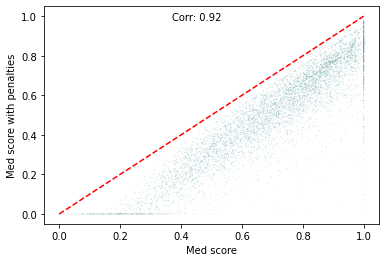

<Figure size 432x288 with 0 Axes>

In [94]:
if calc_adherence:
    %matplotlib inline
    # U, p = stats.mannwhitneyu(ridge_diet_scores, lgbm_diet_scores, alternative='two-sided')
    to_plot = pd.concat([med_score_per_day_orig, med_score_per_day] , axis=1)
    to_plot.columns = ["Med score", "Med score with penalties"]
    to_plot.plot.scatter("Med score", "Med score with penalties", alpha=0.3, color='cadetblue', edgecolors='none', s=1)
    # plt.title("Med score VS Med score with penalties")
    plt.plot([0, 1], [0, 1], 'r--')
    # plt.grid()
    plt.text(0.45, plt.ylim()[0] + 0.95 * (plt.ylim()[1] - plt.ylim()[0]), f'Corr: {pearson_correlation:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
    plt.show()
    plt.clf()

In [95]:
log_date['MainCategoryEng'].unique()

array(['Drinks', 'Cereals', 'Others', 'Bread', 'Hardcheese',
       'fruitjuicesandsoftdrinks', 'Fruits', 'Vegetables', 'sweets',
       'Nutsseedsandproducts', 'bakedgoods', 'Poultryanditsproducts',
       'PastaGrainsandSidedishes', 'MedOilandfats',
       'Beefveallambandothermeatproducts', 'Pulsesandproducts',
       'AlcoholicDrinks', 'Soupsandsauces', 'Fishandseafood',
       'PastaGrainsandSidedishes_wholewheat', 'Oilsandfats',
       'Bread_wholewheat', 'Eggsandtheirproducts', 'Spicesandherbs',
       'Proccessedmeatproducts', 'Cannedvegandfruits',
       'milkcreamcheeseandyogurts', 'Lowcaloriesanddietdrinks', 'Snacks',
       'FastFoods', 'Deepfriedfoods', 'sweetmilkproducts', nan,
       'Industrializedvegetarianfoodreadytoeat'], dtype=object)

In [96]:
if calc_adherence:

    # Define thresholds for base and moderation foods
    base_food_thresholds = {
        'Vegetables': 100,
        ('Poultryanditsproducts', 'Beefveallambandothermeatproducts', 'Fishandseafood', 'Eggsandtheirproducts'): 0.2,  # Shared threshold
        ('MedOilandfats', 'Oilandfats'): 0.2,  # Shared threshold
    }
    moderation_food_thresholds = {
        'Carbohydrate, by difference': 0.2,
    }

    paleo_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Paleo"] == 1].tolist()

    paleo_score_per_day = get_diet_pattern_calories(log_date, paleo_diet_foods, base_food_thresholds, moderation_food_thresholds)
    paleo_score_per_day

In [97]:
if calc_adherence:
    # Correlation between adherence scores with or without the penalties
    pearson_correlation = paleo_score_per_day.corr(paleo_score_per_day_orig)

    # Display the Pearson correlation coefficient
    print(f"Pearson correlation: {pearson_correlation}")


Pearson correlation: 0.7637597487618452


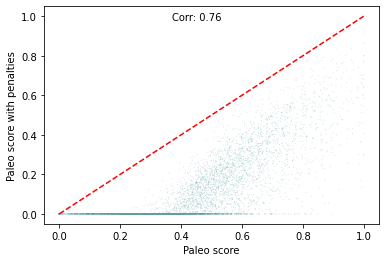

<Figure size 432x288 with 0 Axes>

In [98]:
if calc_adherence:
    %matplotlib inline
    # U, p = stats.mannwhitneyu(ridge_diet_scores, lgbm_diet_scores, alternative='two-sided')
    to_plot = pd.concat([paleo_score_per_day_orig, paleo_score_per_day] , axis=1)
    to_plot.columns = ["Paleo score", "Paleo score with penalties"]
    to_plot.plot.scatter("Paleo score", "Paleo score with penalties", alpha=0.3, color='cadetblue', edgecolors='none', s=1)
    # plt.title("Med score VS Med score with penalties")
    plt.plot([0, 1], [0, 1], 'r--')
    # plt.grid()
    plt.text(0.45, plt.ylim()[0] + 0.95 * (plt.ylim()[1] - plt.ylim()[0]), f'Corr: {pearson_correlation:.2f}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='white'))
    plt.show()
    plt.clf()

In [99]:
if calc_adherence:

    # Define thresholds for base and moderation foods
    base_food_thresholds = {
        'Vegetables': 100,
        ('Poultryanditsproducts', 'Beefveallambandothermeatproducts', 'Fishandseafood', 'Eggsandtheirproducts'): 0.1,  # Shared threshold
        ('MedOilandfats', 'Oilandfats'): 0.1,  # Shared threshold
    }
    moderation_food_thresholds = {
        'Carbohydrate, by difference': 0.2,
    }

    paleo_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Paleo"] == 1].tolist()

    paleo_score_per_day_10_10 = get_diet_pattern_calories(log_date, paleo_diet_foods, base_food_thresholds, moderation_food_thresholds)
    paleo_score_per_day_10_10

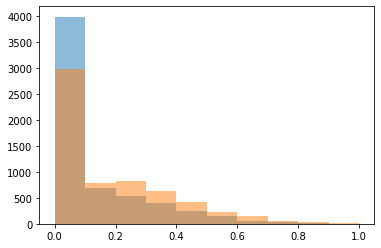

In [100]:
if calc_adherence:
    plt.hist(paleo_score_per_day, alpha=0.5)
    plt.hist(paleo_score_per_day_10_10, alpha=0.5)

In [101]:
# diet_foods_df.columns[diet_foods_df.loc["Paleo"] == 1].tolist()

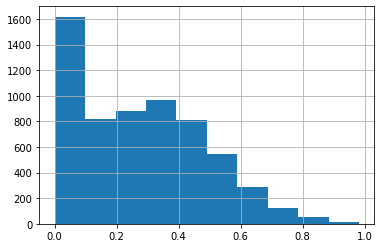

In [102]:
if calc_adherence:

    # Define thresholds for base and moderation foods
    base_food_thresholds = {
        'Vegetables': 100,
        'Fruits': 100,
        ('PastaGrainsandSidedishes_wholewheat', 'Bread_wholewheat'): 0.05,  # Shared threshold for whole grains
        'Pulsesandproducts': 0.05,
        'Nutsseedsandproducts': 0.05,
    }
    moderation_food_thresholds = {}

    wfpb_diet_foods = diet_foods_df.columns[diet_foods_df.loc["WFPB"] == 1].tolist()

    wfpb_score_per_day = get_diet_pattern_calories(log_date, wfpb_diet_foods, base_food_thresholds, moderation_food_thresholds)
    wfpb_score_per_day.hist()

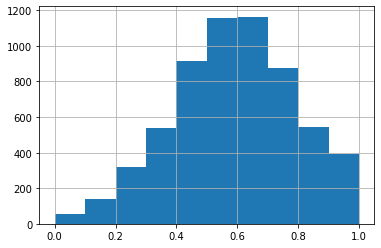

In [103]:
if calc_adherence:
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    vegan_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Vegan"] == 1].tolist()

    vegan_score_per_day = get_diet_pattern_calories(log_date, vegan_diet_foods, base_food_thresholds, moderation_food_thresholds)
    vegan_score_per_day.hist()

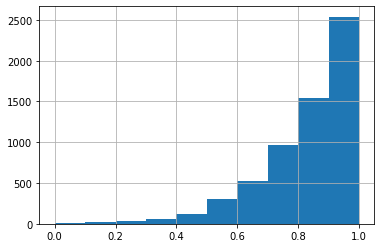

In [104]:
if calc_adherence:
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    vegetarian_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Vegetarian"] == 1].tolist()

    vegetarian_score_per_day = get_diet_pattern_calories(log_date, vegetarian_diet_foods, base_food_thresholds, moderation_food_thresholds)
    vegetarian_score_per_day.hist()

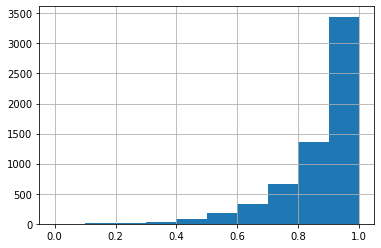

In [105]:
if calc_adherence:
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {}

    pescatarian_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Pescatarian"] == 1].tolist()

    pescatarian_score_per_day = get_diet_pattern_calories(log_date, pescatarian_diet_foods, base_food_thresholds, moderation_food_thresholds)
    pescatarian_score_per_day.hist()

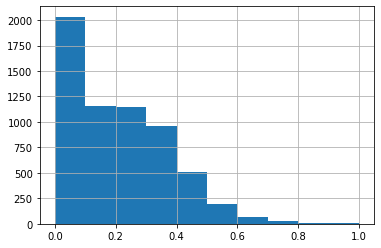

In [106]:
if calc_adherence:
    
    # Define thresholds for base and moderation foods
    base_food_thresholds = {}
    moderation_food_thresholds = {
        ('Hardcheese', 'milkcreamcheeseandyogurts'): 0.5,
        #'Carbohydrate, by difference': 0.2,
    }

    carnivore_diet_foods = diet_foods_df.columns[diet_foods_df.loc["Carnivore"] == 1].tolist()

    carnivore_score_per_day = get_diet_pattern_calories(log_date, carnivore_diet_foods, base_food_thresholds, moderation_food_thresholds)
    carnivore_score_per_day.hist()

In [107]:
if calc_adherence:
    # Concatenate the Series into a DataFrame
    df = pd.concat([med_score_per_day, paleo_score_per_day, vegetarian_score_per_day, wfpb_score_per_day, vegan_score_per_day, pescatarian_score_per_day, carnivore_score_per_day], axis=1)
    df.columns = ['med_score_per_day', 'paleo_score_per_day', 'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 'pescatarian_score_per_day', 'carnivore_score_per_day']

    # Save the DataFrame to a CSV file
    if stage == 'baseline':
        df.to_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores.csv', index=True)
    if stage == '02_00_visit':
        df.to_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores_02_visit.csv', index=True)

# Reload the DataFrame from the CSV file
if stage == 'baseline':
    diet_adherence_scores = pd.read_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores.csv', index_col=[0,1])
if stage == '02_00_visit':
    diet_adherence_scores = pd.read_csv('/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/diet_adherence_scores_02_visit.csv', index_col=[0,1])

# Display the reloaded DataFrame
diet_adherence_scores

med_score_per_day  paleo_score_per_day  \
RegistrationCode Day                                                  
10K_1060368979   2021-02-28           0.153565             0.000000   
                 2021-03-01           0.000000             0.000000   
                 2021-03-02           0.000000             0.000000   
                 2021-03-03           0.313534             0.000000   
                 2021-03-04           0.309957             0.000000   
...                                        ...                  ...   
10K_9862170019   2024-07-02           0.872938             0.722353   
                 2024-07-03           0.000000             0.000000   
                 2024-07-05           0.000000             0.000000   
                 2024-07-06           0.299228             0.158553   
                 2024-07-07           0.000000             0.000000   

                             vegetarian_score_per_day  wfpb_score_per_day  \
RegistrationCode Day                                                        
10K_1060368979   2021-02-28                  1.000000            0.116095   
                 2021-03-01                  1.000000            0.017903   
                 2021-03-02                  0.823898            0.033822   
                 2021-03-03                  1.000000            0.107680   
                 2021-03-04                  0.802626            0.109652   
...                                               ...                 ...   
10K_9862170019   2024-07-02                  0.698138            0.357098   
                 2024-07-03                  1.000000            0.000000   
                 2024-07-05                  1.000000            0.000000   
                 2024-07-06                  0.597942            0.000000   
                 2024-07-07                  0.479803            0.000000   

                             vegan_score_per_day  pescatarian_score_per_day  \
RegistrationCode Day                                                          
10K_1060368979   2021-02-28             0.845130                   1.000000   
                 2021-03-01             0.472892                   1.000000   
                 2021-03-02             0.459039                   0.823898   
                 2021-03-03             0.640711                   1.000000   
                 2021-03-04             0.684302                   0.802626   
...                                          ...                        ...   
10K_9862170019   2024-07-02             0.550304                   0.698138   
                 2024-07-03             0.052579                   1.000000   
                 2024-07-05             0.187733                   1.000000   
                 2024-07-06             0.212682                   1.000000   
                 2024-07-07             0.051175                   0.479803   

                             carnivore_score_per_day  
RegistrationCode Day                                  
10K_1060368979   2021-02-28                 0.068278  
                 2021-03-01                 0.000000  
                 2021-03-02                 0.000000  
                 2021-03-03                 0.000000  
                 2021-03-04                 0.238691  
...                                              ...  
10K_9862170019   2024-07-02                 0.067439  
                 2024-07-03                 0.036614  
                 2024-07-05                 0.006916  
                 2024-07-06                 0.564320  
                 2024-07-07                 0.000000  

[6110 rows x 7 columns]

In [108]:
temp = log_date_reset.copy()
temp['hh'] = temp['Hour'].str[0:3]
temp['mm'] = temp['Hour'].str[4:]
temp['Hour'] = temp['hh'].astype(int) * 60 + temp['mm'].astype(int)

grouped = temp.groupby(['RegistrationCode', 'Day'])['Hour']
eating_window_min = grouped.min()
eating_window_max = grouped.max()
eating_window = eating_window_max - eating_window_min
fasting_window = 1440 - eating_window
fasting_window = fasting_window / 60
fasting_window.index = fasting_window.index.set_levels([
    fasting_window.index.levels[0],  # Keep RegistrationCode as is
    fasting_window.index.levels[1].astype(str)  # Convert Day to object
])
fasting_window

RegistrationCode  Day       
10K_1060368979    2021-02-28    10.316667
                  2021-03-01     8.783333
                  2021-03-02    10.250000
                  2021-03-03    12.833333
                  2021-03-04     9.916667
                                  ...    
10K_9862170019    2024-07-02     9.650000
                  2024-07-03    10.616667
                  2024-07-05     9.983333
                  2024-07-06    10.150000
                  2024-07-07    11.866667
Name: Hour, Length: 6110, dtype: float64

## Group by Days

In [109]:
log_day = log_date.groupby(['RegistrationCode', 'Day'])[nutr_list].sum()
log_day = log_day[log_day['Energy']>500]
log_day = log_day[log_day['Energy']<4000]
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1060368979   2021-02-28  0.022790           0.017139   
                 2021-03-01  0.018825           0.041694   
                 2021-03-02  0.034123           0.038766   
                 2021-03-03  0.022093           0.043331   
                 2021-03-04  0.048730           0.031580   
...                               ...                ...   
10K_9862170019   2024-07-02  0.040434           0.058549   
                 2024-07-03  0.033709           0.029213   
                 2024-07-05  0.026731           0.027590   
                 2024-07-06  0.042608           0.065247   
                 2024-07-07  0.063776           0.051051   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1060368979   2021-02-28                     0.192261  1083.811785   
                 2021-03-01                     0.142500  1000.460000   
                 2021-03-02                     0.127949  1446.037000   
                 2021-03-03                     0.135246  1130.548328   
                 2021-03-04                     0.127625  1791.015014   
...                                                  ...          ...   
10K_9862170019   2024-07-02                     0.077921  1582.179996   
                 2024-07-03                     0.144848  1680.487778   
                 2024-07-05                     0.153753  2197.800000   
                 2024-07-06                     0.059224  1906.790000   
                 2024-07-07                     0.070803  2895.055000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1060368979   2021-02-28        0.000000  0.740975              0.013933   
                 2021-03-01        0.000000  0.705366              0.010022   
                 2021-03-02        0.000000  0.941653              0.005677   
                 2021-03-03        0.000226  0.286015              0.014622   
                 2021-03-04        0.000143  0.374869              0.007520   
...                                     ...       ...                   ...   
10K_9862170019   2024-07-02        0.000000  0.845949              0.013273   
                 2024-07-03        0.000000  0.301002              0.010362   
                 2024-07-05        0.000000  0.313387              0.006499   
                 2024-07-06        0.000000  0.369647              0.003345   
                 2024-07-07        0.000000  0.347443              0.003795   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1060368979   2021-02-28     0.454568  0.012843       0.160944  ...   
                 2021-03-01     0.216256  0.013218       0.174027  ...   
                 2021-03-02     0.214585  0.011261       0.139933  ...   
                 2021-03-03     0.305040  0.013865       0.117189  ...   
                 2021-03-04     0.201076  0.011689       0.154717  ...   
...                                  ...       ...            ...  ...   
10K_9862170019   2024-07-02     0.533392  0.008234       0.150823  ...   
                 2024-07-03     0.564349  0.003683       0.120284  ...   
                 2024-07-05     0.291614  0.004878       0.076813  ...   
                 2024-07-06     0.683871  0.002726       0.115217  ...   
                 2024-07-07     1.106685  0.005539       0.114819  ...   

                             Hydroxyproline  Lutein + zeaxanthin  Lycopene  \
RegistrationCode Day                                                         
10K_1060368979   2021-02-28        0.000000             0.991776  0.661246   
                 2021-03-01        0.000003             1.588817  0.479779

In [110]:
check_in_yishay(log_day)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_2455355185 Celiac


In [111]:
fasting_window.reindex(log_day.index)

RegistrationCode  Day       
10K_1060368979    2021-02-28    10.316667
                  2021-03-01     8.783333
                  2021-03-02    10.250000
                  2021-03-03    12.833333
                  2021-03-04     9.916667
                                  ...    
10K_9862170019    2024-07-02     9.650000
                  2024-07-03    10.616667
                  2024-07-05     9.983333
                  2024-07-06    10.150000
                  2024-07-07    11.866667
Name: Hour, Length: 6110, dtype: float64

In [112]:
log_day["Foods_per_meal"] = foods_per_meal
log_day["Foods_per_day"] = foods_per_day
log_day["Meals_per_day"] = meals_per_day
log_day['Fasting_window'] = fasting_window
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1060368979   2021-02-28  0.022790           0.017139   
                 2021-03-01  0.018825           0.041694   
                 2021-03-02  0.034123           0.038766   
                 2021-03-03  0.022093           0.043331   
                 2021-03-04  0.048730           0.031580   
...                               ...                ...   
10K_9862170019   2024-07-02  0.040434           0.058549   
                 2024-07-03  0.033709           0.029213   
                 2024-07-05  0.026731           0.027590   
                 2024-07-06  0.042608           0.065247   
                 2024-07-07  0.063776           0.051051   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1060368979   2021-02-28                     0.192261  1083.811785   
                 2021-03-01                     0.142500  1000.460000   
                 2021-03-02                     0.127949  1446.037000   
                 2021-03-03                     0.135246  1130.548328   
                 2021-03-04                     0.127625  1791.015014   
...                                                  ...          ...   
10K_9862170019   2024-07-02                     0.077921  1582.179996   
                 2024-07-03                     0.144848  1680.487778   
                 2024-07-05                     0.153753  2197.800000   
                 2024-07-06                     0.059224  1906.790000   
                 2024-07-07                     0.070803  2895.055000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1060368979   2021-02-28        0.000000  0.740975              0.013933   
                 2021-03-01        0.000000  0.705366              0.010022   
                 2021-03-02        0.000000  0.941653              0.005677   
                 2021-03-03        0.000226  0.286015              0.014622   
                 2021-03-04        0.000143  0.374869              0.007520   
...                                     ...       ...                   ...   
10K_9862170019   2024-07-02        0.000000  0.845949              0.013273   
                 2024-07-03        0.000000  0.301002              0.010362   
                 2024-07-05        0.000000  0.313387              0.006499   
                 2024-07-06        0.000000  0.369647              0.003345   
                 2024-07-07        0.000000  0.347443              0.003795   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1060368979   2021-02-28     0.454568  0.012843       0.160944  ...   
                 2021-03-01     0.216256  0.013218       0.174027  ...   
                 2021-03-02     0.214585  0.011261       0.139933  ...   
                 2021-03-03     0.305040  0.013865       0.117189  ...   
                 2021-03-04     0.201076  0.011689       0.154717  ...   
...                                  ...       ...            ...  ...   
10K_9862170019   2024-07-02     0.533392  0.008234       0.150823  ...   
                 2024-07-03     0.564349  0.003683       0.120284  ...   
                 2024-07-05     0.291614  0.004878       0.076813  ...   
                 2024-07-06     0.683871  0.002726       0.115217  ...   
                 2024-07-07     1.106685  0.005539       0.114819  ...   

                              Proline    Starch  matched_food_score   omega_6  \
RegistrationCode Day                                                            
10K_1060368979   2021-02-28  0.002545  0.061556                 0.0  0.006871   
                 2021-03-01  0.002056  0.055258                 0

In [113]:
# Convert indices to strings if they aren't already
log_day.index = log_day.index.set_levels([log_day.index.levels[0].astype(str), log_day.index.levels[1]])
plant_foods_per_day.index = plant_foods_per_day.index.set_levels([plant_foods_per_day.index.levels[0].astype(str), plant_foods_per_day.index.levels[1]])
plant_foods_per_week.index = plant_foods_per_week.index.set_levels([plant_foods_per_week.index.levels[0].astype(str), plant_foods_per_week.index.levels[1]])


In [114]:
log_day["plant_foods_per_day"] = plant_foods_per_day
log_day["plant_foods_per_week"] = plant_foods_per_week
log_day["plant_energy_pct"] = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['plant_energy_pct'].first()
log_day["plant_protein_pct"] = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['plant_protein_pct'].first()
log_day["plant_fat_pct"] = log_date.reset_index().groupby(['RegistrationCode', 'Day'])['plant_fat_pct'].first()
log_day = log_day.dropna()
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1060368979   2021-02-28  0.022790           0.017139   
                 2021-03-01  0.018825           0.041694   
                 2021-03-02  0.034123           0.038766   
                 2021-03-03  0.022093           0.043331   
                 2021-03-04  0.048730           0.031580   
...                               ...                ...   
10K_9862170019   2024-07-02  0.040434           0.058549   
                 2024-07-03  0.033709           0.029213   
                 2024-07-05  0.026731           0.027590   
                 2024-07-06  0.042608           0.065247   
                 2024-07-07  0.063776           0.051051   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1060368979   2021-02-28                     0.192261  1083.811785   
                 2021-03-01                     0.142500  1000.460000   
                 2021-03-02                     0.127949  1446.037000   
                 2021-03-03                     0.135246  1130.548328   
                 2021-03-04                     0.127625  1791.015014   
...                                                  ...          ...   
10K_9862170019   2024-07-02                     0.077921  1582.179996   
                 2024-07-03                     0.144848  1680.487778   
                 2024-07-05                     0.153753  2197.800000   
                 2024-07-06                     0.059224  1906.790000   
                 2024-07-07                     0.070803  2895.055000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1060368979   2021-02-28        0.000000  0.740975              0.013933   
                 2021-03-01        0.000000  0.705366              0.010022   
                 2021-03-02        0.000000  0.941653              0.005677   
                 2021-03-03        0.000226  0.286015              0.014622   
                 2021-03-04        0.000143  0.374869              0.007520   
...                                     ...       ...                   ...   
10K_9862170019   2024-07-02        0.000000  0.845949              0.013273   
                 2024-07-03        0.000000  0.301002              0.010362   
                 2024-07-05        0.000000  0.313387              0.006499   
                 2024-07-06        0.000000  0.369647              0.003345   
                 2024-07-07        0.000000  0.347443              0.003795   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1060368979   2021-02-28     0.454568  0.012843       0.160944  ...   
                 2021-03-01     0.216256  0.013218       0.174027  ...   
                 2021-03-02     0.214585  0.011261       0.139933  ...   
                 2021-03-03     0.305040  0.013865       0.117189  ...   
                 2021-03-04     0.201076  0.011689       0.154717  ...   
...                                  ...       ...            ...  ...   
10K_9862170019   2024-07-02     0.533392  0.008234       0.150823  ...   
                 2024-07-03     0.564349  0.003683       0.120284  ...   
                 2024-07-05     0.291614  0.004878       0.076813  ...   
                 2024-07-06     0.683871  0.002726       0.115217  ...   
                 2024-07-07     1.106685  0.005539       0.114819  ...   

                             vitamin_E  Foods_per_meal  Foods_per_day  \
RegistrationCode Day                                                    
10K_1060368979   2021-02-28   0.011424           2.125             14   
                 2021-03-01   0.022015           2.000             13   
                

In [115]:
diet_adherence_scores

med_score_per_day  paleo_score_per_day  \
RegistrationCode Day                                                  
10K_1060368979   2021-02-28           0.153565             0.000000   
                 2021-03-01           0.000000             0.000000   
                 2021-03-02           0.000000             0.000000   
                 2021-03-03           0.313534             0.000000   
                 2021-03-04           0.309957             0.000000   
...                                        ...                  ...   
10K_9862170019   2024-07-02           0.872938             0.722353   
                 2024-07-03           0.000000             0.000000   
                 2024-07-05           0.000000             0.000000   
                 2024-07-06           0.299228             0.158553   
                 2024-07-07           0.000000             0.000000   

                             vegetarian_score_per_day  wfpb_score_per_day  \
RegistrationCode Day                                                        
10K_1060368979   2021-02-28                  1.000000            0.116095   
                 2021-03-01                  1.000000            0.017903   
                 2021-03-02                  0.823898            0.033822   
                 2021-03-03                  1.000000            0.107680   
                 2021-03-04                  0.802626            0.109652   
...                                               ...                 ...   
10K_9862170019   2024-07-02                  0.698138            0.357098   
                 2024-07-03                  1.000000            0.000000   
                 2024-07-05                  1.000000            0.000000   
                 2024-07-06                  0.597942            0.000000   
                 2024-07-07                  0.479803            0.000000   

                             vegan_score_per_day  pescatarian_score_per_day  \
RegistrationCode Day                                                          
10K_1060368979   2021-02-28             0.845130                   1.000000   
                 2021-03-01             0.472892                   1.000000   
                 2021-03-02             0.459039                   0.823898   
                 2021-03-03             0.640711                   1.000000   
                 2021-03-04             0.684302                   0.802626   
...                                          ...                        ...   
10K_9862170019   2024-07-02             0.550304                   0.698138   
                 2024-07-03             0.052579                   1.000000   
                 2024-07-05             0.187733                   1.000000   
                 2024-07-06             0.212682                   1.000000   
                 2024-07-07             0.051175                   0.479803   

                             carnivore_score_per_day  
RegistrationCode Day                                  
10K_1060368979   2021-02-28                 0.068278  
                 2021-03-01                 0.000000  
                 2021-03-02                 0.000000  
                 2021-03-03                 0.000000  
                 2021-03-04                 0.238691  
...                                              ...  
10K_9862170019   2024-07-02                 0.067439  
                 2024-07-03                 0.036614  
                 2024-07-05                 0.006916  
                 2024-07-06                 0.564320  
                 2024-07-07                 0.000000  

[6110 rows x 7 columns]

In [116]:
log_day = log_day.join(diet_adherence_scores, how='inner')

In [117]:
log_day['pct_protein_calories'] = (log_day['Protein']*4) * 100
log_day['pct_carb_calories'] = (log_day['Carbohydrate, by difference']*4) * 100
log_day['pct_fat_calories'] = (log_day['Total lipid (fat)']*9) * 100
log_day['pct_alcohol_calories'] = (log_day['Alcohol, ethyl']*7) * 100
# log_day['pct_protein_calories'] = (log_day['Protein']*4 / log_day['Energy']) * 100
# log_day['pct_carb_calories'] = (log_day['Carbohydrate, by difference']*4 / log_day['Energy']) * 100
# log_day['pct_fat_calories'] = (log_day['Total lipid (fat)']*9 / log_day['Energy']) * 100
log_day

Protein  Total lipid (fat)  \
RegistrationCode Day                                       
10K_1060368979   2021-02-28  0.022790           0.017139   
                 2021-03-01  0.018825           0.041694   
                 2021-03-02  0.034123           0.038766   
                 2021-03-03  0.022093           0.043331   
                 2021-03-04  0.048730           0.031580   
...                               ...                ...   
10K_9862170019   2024-07-02  0.040434           0.058549   
                 2024-07-03  0.033709           0.029213   
                 2024-07-05  0.026731           0.027590   
                 2024-07-06  0.042608           0.065247   
                 2024-07-07  0.063776           0.051051   

                             Carbohydrate, by difference       Energy  \
RegistrationCode Day                                                    
10K_1060368979   2021-02-28                     0.192261  1083.811785   
                 2021-03-01                     0.142500  1000.460000   
                 2021-03-02                     0.127949  1446.037000   
                 2021-03-03                     0.135246  1130.548328   
                 2021-03-04                     0.127625  1791.015014   
...                                                  ...          ...   
10K_9862170019   2024-07-02                     0.077921  1582.179996   
                 2024-07-03                     0.144848  1680.487778   
                 2024-07-05                     0.153753  2197.800000   
                 2024-07-06                     0.059224  1906.790000   
                 2024-07-07                     0.070803  2895.055000   

                             Alcohol, ethyl     Water  Fiber, total dietary  \
RegistrationCode Day                                                          
10K_1060368979   2021-02-28        0.000000  0.740975              0.013933   
                 2021-03-01        0.000000  0.705366              0.010022   
                 2021-03-02        0.000000  0.941653              0.005677   
                 2021-03-03        0.000226  0.286015              0.014622   
                 2021-03-04        0.000143  0.374869              0.007520   
...                                     ...       ...                   ...   
10K_9862170019   2024-07-02        0.000000  0.845949              0.013273   
                 2024-07-03        0.000000  0.301002              0.010362   
                 2024-07-05        0.000000  0.313387              0.006499   
                 2024-07-06        0.000000  0.369647              0.003345   
                 2024-07-07        0.000000  0.347443              0.003795   

                             Calcium, Ca  Iron, Fe  Magnesium, Mg  ...  \
RegistrationCode Day                                               ...   
10K_1060368979   2021-02-28     0.454568  0.012843       0.160944  ...   
                 2021-03-01     0.216256  0.013218       0.174027  ...   
                 2021-03-02     0.214585  0.011261       0.139933  ...   
                 2021-03-03     0.305040  0.013865       0.117189  ...   
                 2021-03-04     0.201076  0.011689       0.154717  ...   
...                                  ...       ...            ...  ...   
10K_9862170019   2024-07-02     0.533392  0.008234       0.150823  ...   
                 2024-07-03     0.564349  0.003683       0.120284  ...   
                 2024-07-05     0.291614  0.004878       0.076813  ...   
                 2024-07-06     0.683871  0.002726       0.115217  ...   
                 2024-07-07     1.106685  0.005539       0.114819  ...   

                             paleo_score_per_day  vegetarian_score_per_day  \
RegistrationCode Day                                                         
10K_1060368979   2021-02-28             0.000000                  1.000000   
                 2021-03-01             0.000000                  1.000000

In [118]:
log_day['sat_to_total_lipids_ratio'] = log_day['Fatty acids, total saturated'] / log_day['Total lipid (fat)']
log_day['trans_to_total_lipids_ratio'] = log_day['Fatty acids, total trans'] / log_day['Total lipid (fat)']
log_day['mono_to_total_lipids_ratio'] = log_day['Fatty acids, total monounsaturated'] / log_day['Total lipid (fat)']
log_day['poly_to_total_lipids_ratio'] = log_day['Fatty acids, total polyunsaturated'] / log_day['Total lipid (fat)']
log_day['omega3_to_total_lipids_ratio'] = log_day['omega_3'] / log_day['Total lipid (fat)']
log_day['omega6_to_total_lipids_ratio'] = log_day['omega_6'] / log_day['Total lipid (fat)']

log_day['pct_saturated_fat_calories'] = (log_day['Fatty acids, total saturated']*9 / log_day['Energy']) * 100
log_day['pct_saturated_fat_calories']


RegistrationCode  Day       
10K_1060368979    2021-02-28    0.005086
                  2021-03-01    0.014131
                  2021-03-02    0.008856
                  2021-03-03    0.008760
                  2021-03-04    0.005982
                                  ...   
10K_9862170019    2024-07-02    0.009495
                  2024-07-03    0.004821
                  2024-07-05    0.003760
                  2024-07-06    0.013593
                  2024-07-07    0.005236
Name: pct_saturated_fat_calories, Length: 6102, dtype: float64

In [119]:
log_day['shannon_entropy_per_day'] = shannon_per_day

### Calculate daily minimum requirements features

In [120]:
# new, DRI
thresholds_men_30_50 = {
    'Calcium, Ca': 1000,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 4,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 8,  # mg/d
    'Magnesium, Mg': 420,  # mg/d
    'Manganese, Mn': 2.3,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 11,  # mg/d
    'Potassium, K': 3400,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 900,  # µg/d
    'Vitamin C, total ascorbic acid': 90,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 120,  # µg/d
    'Thiamin': 1.2,  # mg/d
    'Riboflavin': 1.3,  # mg/d
    'Niacin': 16,  # mg/d
    'Vitamin B-6': 1.3,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 550,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 38.0,  # g/d
    'omega_6': 17,  # g/d (Linoleic Acid)
    'omega_3': 1.6,  # g/d (α-Linolenic Acid)
    'Protein': 56  # g/d
}

thresholds_men_51_70 = {
    'Calcium, Ca': 1000,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 4,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 8,  # mg/d
    'Magnesium, Mg': 420,  # mg/d
    'Manganese, Mn': 2.3,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 11,  # mg/d
    'Potassium, K': 3400,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 900,  # µg/d
    'Vitamin C, total ascorbic acid': 90,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 120,  # µg/d
    'Thiamin': 1.2,  # mg/d
    'Riboflavin': 1.3,  # mg/d
    'Niacin': 16,  # mg/d
    'Vitamin B-6': 1.7,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 550,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 30.0,  # g/d
    'omega_6': 14,  # g/d (Linoleic Acid)
    'omega_3': 1.6,  # g/d (α-Linolenic Acid)
    'Protein': 56  # g/d
}

thresholds_women_30_50 = {
    'Calcium, Ca': 1000,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 3,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 18,  # mg/d
    'Magnesium, Mg': 320,  # mg/d
    'Manganese, Mn': 1.8,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 8,  # mg/d
    'Potassium, K': 2600,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 700,  # µg/d
    'Vitamin C, total ascorbic acid': 75,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 90,  # µg/d
    'Thiamin': 1.1,  # mg/d
    'Riboflavin': 1.1,  # mg/d
    'Niacin': 14,  # mg/d
    'Vitamin B-6': 1.3,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 425,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 25.0,  # g/d
    'omega_6': 12,  # g/d (Linoleic Acid)
    'omega_3': 1.1,  # g/d (α-Linolenic Acid)
    'Protein': 46  # g/d
}

thresholds_women_51_70 = {
    'Calcium, Ca': 1200,  # mg/d
    'Copper, Cu': 0.9,  # mg/d
    'Fluoride, F': 3,  # mg/d
    'Iodine': 150,  # µg/d
    'Iron, Fe': 8,  # mg/d
    'Magnesium, Mg': 320,  # mg/d
    'Manganese, Mn': 1.8,  # mg/d
    'Phosphorus, P': 700,  # mg/d
    'Selenium, Se': 55,  # µg/d
    'Zinc, Zn': 8,  # mg/d
    'Potassium, K': 2600,  # mg/d
    'Sodium, Na': 1500,  # mg/d
    'Vitamin A, RAE': 700,  # µg/d
    'Vitamin C, total ascorbic acid': 75,  # mg/d
    'Vitamin D (D2 + D3)': 15,  # µg/d
    'vitamin_E': 15,  # mg/d
    'Vitamin K': 90,  # µg/d
    'Thiamin': 1.1,  # mg/d
    'Riboflavin': 1.1,  # mg/d
    'Niacin': 14,  # mg/d
    'Vitamin B-6': 1.5,  # mg/d
    'Folate, total': 400,  # µg/d
    'Vitamin B-12': 2.4,  # µg/d
    'Pantothenic acid': 5,  # mg/d
    'Biotin': 30,  # µg/d
    'Choline, total': 425,  # mg/d
    'Carbohydrate, by difference': 130,  # g/d
    'Fiber, total dietary': 21.0,  # g/d
    'omega_6': 11,  # g/d (Linoleic Acid)
    'omega_3': 1.1,  # g/d (α-Linolenic Acid)
    'Protein': 46  # g/d
}


thresholds_max = {
    'Calcium, Ca': 2500,  # mg/d
    'Iron, Fe': 45,  # mg/d
    'Zinc, Zn': 40,  # mg/d
    'Sodium, Na': 2300,  # mg/d
    'Vitamin A, RAE': 3000,  # µg/d
    'Vitamin C, total ascorbic acid': 2000,  # mg/d
    'Vitamin D (D2 + D3)': 100,  # µg/d
    'Vitamin E': 1000,  # mg/d
    'Manganese, Mn': 11,  # mg/d
    'Niacin': 35,  # mg/d
    'Vitamin B-6': 100,  # mg/d
    'Folate, total': 1000,  # µg/d
    'Choline, total': 3500,  # mg/d
    'Fluoride, F': 10,  # mg/d
    'Iodine': 1100,  # µg/d
    'Manganese, Mn': 1.8,  # mg/d
    'Phosphorus, P': 4000,  # mg/d
    'Selenium, Se': 400,  # µg/d
    'Copper, Cu': 10,  # mg/d
}

In [121]:
log_day = log_day.join(subjects_df[["age", "gender"]])
log_day = log_day.reset_index(level=[1], drop=True)
log_day = log_day.dropna()
log_day

,,Protein,Total lipid (fat),"Carbohydrate, by difference",Energy,"Alcohol, ethyl",Water,"Fiber, total dietary","Calcium, Ca","Iron, Fe","Magnesium, Mg",...,sat_to_total_lipids_ratio,trans_to_total_lipids_ratio,mono_to_total_lipids_ratio,poly_to_total_lipids_ratio,omega3_to_total_lipids_ratio,omega6_to_total_lipids_ratio,pct_saturated_fat_calories,shannon_entropy_per_day,age,gender
RegistrationCode,Date,,,,,,,,,,,,,,,,,,,,,


In [122]:
if david:
    # Step 1: Create a mapping of age & gender groups to thresholds
    thresholds_lookup = {
        ('male', 30, 50): thresholds_men_30_50,
        ('male', 50, 70): thresholds_men_51_70,
        ('female', 30, 50): thresholds_women_30_50,
        ('female', 50, 70): thresholds_women_51_70,
    }

    # Step 2: Function to compute distances
    def compute_distances(row):
        # Determine gender & age
        gender = 'male' if row["gender"] == 1 else 'female'
        age = row["age"]
        
        # Find correct thresholds
        thresholds = None
        for (g, min_age, max_age), thr in thresholds_lookup.items():
            if gender == g and min_age <= age <= max_age:
                thresholds = thr
                break

        # Skip if no matching thresholds
        if thresholds is None:
            return row

        # Compute distance from DRI (minimum threshold)
        for nutrient, min_val in thresholds.items():
            if nutrient in row.index:
                row[f"{nutrient}_distance_from_DRI"] = row[nutrient] - (min_val / row["Energy"])
        
        # Compute distance from UL (maximum threshold) if available
        for nutrient, max_val in thresholds_max.items():
            if nutrient in row.index:
                row[f"{nutrient}_distance_from_UL"] = row[nutrient] - (max_val / row["Energy"])
        
        return row

    # Step 3: Apply function efficiently
    log_day = log_day.apply(compute_distances, axis=1)


In [123]:
def check_threshold_ranges(data, thresholds):
    issues = []
    for nutrient, threshold in thresholds.items():
        if nutrient in data.columns:
            min_val = data[nutrient].min()
            max_val = data[nutrient].max()
            if not (min_val <= threshold / 1500 <= max_val):
                issues.append(f"{nutrient}: Threshold ({threshold}) is outside the range [{min_val*1500}, {max_val*1500}]")
        else:
            issues.append(f"{nutrient}: Column not found in the data")
    return issues

issues = check_threshold_ranges(log_day, thresholds_men_30_50)

if issues:
    print("Issues found with thresholds:")
    for issue in issues:
        print(issue)
else:
    print("All thresholds are within the range of their respective features.")


Issues found with thresholds:
Calcium, Ca: Threshold (1000) is outside the range [nan, nan]
Copper, Cu: Threshold (0.9) is outside the range [nan, nan]
Fluoride, F: Threshold (4) is outside the range [nan, nan]
Iodine: Threshold (150) is outside the range [nan, nan]
Iron, Fe: Threshold (8) is outside the range [nan, nan]
Magnesium, Mg: Threshold (420) is outside the range [nan, nan]
Manganese, Mn: Threshold (2.3) is outside the range [nan, nan]
Phosphorus, P: Threshold (700) is outside the range [nan, nan]
Selenium, Se: Threshold (55) is outside the range [nan, nan]
Zinc, Zn: Threshold (11) is outside the range [nan, nan]
Potassium, K: Threshold (3400) is outside the range [nan, nan]
Sodium, Na: Threshold (1500) is outside the range [nan, nan]
Vitamin A, RAE: Threshold (900) is outside the range [nan, nan]
Vitamin C, total ascorbic acid: Threshold (90) is outside the range [nan, nan]
Vitamin D (D2 + D3): Threshold (15) is outside the range [nan, nan]
vitamin_E: Threshold (15) is outsid

In [124]:
log_day

,,Protein,Total lipid (fat),"Carbohydrate, by difference",Energy,"Alcohol, ethyl",Water,"Fiber, total dietary","Calcium, Ca","Iron, Fe","Magnesium, Mg",...,sat_to_total_lipids_ratio,trans_to_total_lipids_ratio,mono_to_total_lipids_ratio,poly_to_total_lipids_ratio,omega3_to_total_lipids_ratio,omega6_to_total_lipids_ratio,pct_saturated_fat_calories,shannon_entropy_per_day,age,gender
RegistrationCode,Date,,,,,,,,,,,,,,,,,,,,,


In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select columns with distance from DRV
distance_columns = [col for col in log_day.columns if '_distance_from_UL' in col or '_distance_from_DRI' in col]

# Remove columns that contain only NaN values
valid_columns = [col for col in distance_columns if not log_day[col].isna().all()]

# If no valid columns exist, raise an informative error
if not valid_columns:
    raise ValueError("No valid data to plot. All selected columns contain only NaN values.")

# Determine the maximum y-axis limit for all histograms
max_y = 0
for col in valid_columns:
    counts, _ = np.histogram(log_day[col].dropna(), bins=20)  # Drop NaNs before histogram
    max_y = max(max_y, counts.max())

# Determine grid size (e.g., 2 columns)
n_cols = 2
n_rows = (len(valid_columns) + n_cols - 1) // n_cols

# Plotting with uniform Y-axis
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 4 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, col in zip(axes, valid_columns):
    ax.hist(log_day[col].dropna(), bins=20, alpha=0.7)  # Drop NaNs before plotting
    ax.set_title(f'{col}')
    ax.set_xlabel('Distance from DRI')
    ax.set_ylabel('Frequency')
    ax.set_ylim(0, max_y)  # Set uniform Y-axis limit
    ax.axvline(0, color='black', linestyle='--')  # Add a vertical line at 0

# Hide any unused subplots
for ax in axes[len(valid_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


ValueError: No valid data to plot. All selected columns contain only NaN values.

In [ ]:
nan_columns_partial = [col for col in distance_columns if log_day[col].isna().any()]

print("Columns containing at least one NaN value:")
print(nan_columns_partial)


Columns containing at least one NaN value:
[]


<AxesSubplot:>

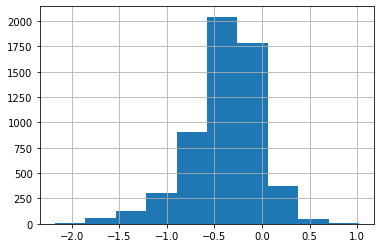

In [ ]:
log_day["Calcium, Ca_distance_from_DRI"].head()
log_day["Calcium, Ca_distance_from_DRI"].hist()

In [ ]:
log_day = log_day.drop(columns=["age", "gender"])

## Variance Features

In [ ]:
# # log_grouped = log_day.reset_index().groupby(['RegistrationCode']).mean()
# log_grouped = log_day.reset_index().drop("Day", axis=1).groupby(['RegistrationCode']).mean()
# log_grouped

In [ ]:
# Step 1: Reset index and drop "Day"
log_reset = log_day.reset_index().drop("Date", axis=1)

# Group by RegistrationCode and calculate mean for all numeric columns
log_grouped = log_reset.groupby('RegistrationCode').mean()

cols_to_std = [
    'Foods_per_day',
    'Foods_per_meal',
    'Meals_per_day',
    'plant_foods_per_day',
    'plant_foods_per_week',
    'med_score_per_day',
    'paleo_score_per_day',
    'vegetarian_score_per_day',
    'wfpb_score_per_day',
    'vegan_score_per_day',
    'carnivore_score_per_day',
    'Protein',
    'Total lipid (fat)',
    'Carbohydrate, by difference',
    'Energy',
    'pct_protein_calories',
    'pct_carb_calories',
    'pct_fat_calories'
]


for col in cols_to_std:
    # Add standard deviation for Foods_per_day and Meals_per_day
    log_grouped[f'{col}_std'] = log_reset.groupby('RegistrationCode')[col].std()

# Display the resulting DataFrame
log_grouped


,Protein,Total lipid (fat),"Carbohydrate, by difference",Energy,"Alcohol, ethyl",Water,"Fiber, total dietary","Calcium, Ca","Iron, Fe","Magnesium, Mg",...,wfpb_score_per_day_std,vegan_score_per_day_std,carnivore_score_per_day_std,Protein_std,Total lipid (fat)_std,"Carbohydrate, by difference_std",Energy_std,pct_protein_calories_std,pct_carb_calories_std,pct_fat_calories_std
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.034287,0.037502,0.130332,1603.315383,0.001856,0.478828,0.011618,0.325879,0.012537,0.156403,...,0.154956,0.185330,0.107446,0.011267,0.009289,0.024423,321.652170,4.506620,9.769056,8.360498
10K_1197934845,0.056178,0.041825,0.097233,1525.965830,0.000390,0.497160,0.007853,0.398865,0.006142,0.132538,...,0.150398,0.162519,0.217803,0.027044,0.008423,0.031999,510.826187,10.817454,12.799720,7.580608
10K_1210197986,0.045340,0.046265,0.102365,2250.414195,0.000000,0.549714,0.011095,0.482064,0.006619,0.190394,...,0.209728,0.176329,0.118368,0.008511,0.008101,0.018217,531.000327,3.404358,7.286939,7.291033
10K_1213119006,0.069929,0.045498,0.080448,984.617492,0.000000,1.160108,0.008103,0.693340,0.006018,0.202734,...,0.128811,0.148313,0.155217,0.014992,0.009183,0.027207,293.214584,5.996855,10.882615,8.264621
10K_1280653108,0.044922,0.050119,0.088914,846.979627,0.003317,0.411492,0.010811,0.199909,0.007065,0.165552,...,0.195589,0.275956,0.202418,0.011550,0.014460,0.035487,221.584375,4.620099,14.194608,13.014230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.028915,0.043262,0.102933,1883.153399,0.014707,0.753361,0.013612,0.414823,0.006865,0.200884,...,0.194721,0.168090,0.069269,0.005696,0.010740,0.020700,519.780671,2.278312,8.279863,9.666301
10K_9703851292,0.044082,0.035510,0.111398,1612.840228,0.008495,0.650526,0.008092,0.469547,0.005665,0.151561,...,0.086810,0.251434,0.161987,0.018561,0.008649,0.028495,646.957359,7.424260,11.398000,7.784295
10K_9790043612,0.055135,0.036499,0.107567,1800.902976,0.002382,0.445031,0.009700,0.213046,0.008355,0.131793,...,0.084297,0.238068,0.251848,0.023050,0.012170,0.037630,789.050432,9.220019,15.052113,10.952893


## Food Names and Catergories Means per Day

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
# Recombine 'Day' and 'Hour' into a single 'Date' column (datetime type)
log_date_test = log_date.reset_index()
log_date_test['Date'] = pd.to_datetime(log_date_test['Day'] + log_date_test['Hour'], utc=True)
log_date_test = log_date_test.drop(columns=['Day', 'Hour']).set_index(['RegistrationCode', 'Date', 'food_id'])
log_date_test

weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1060368979   2021-02-28 07:45:00+00:00 1008191     1.0       3       NaN   
                                           1008281    35.0       1       NaN   
                                           1013615     4.0       3       NaN   
                 2021-02-28 09:30:00+00:00 1007294    40.0     nan       NaN   
                                           1007647    76.0      21       NaN   
...                                                    ...     ...       ...   
10K_9862170019   2024-07-07 13:35:00+00:00 1010266   382.0      21       NaN   
                 2024-07-07 17:36:00+00:00 1008878   300.0      41       NaN   
                                           1010363   300.0      48       NaN   
                 2024-07-07 20:13:00+00:00 1007889    11.0       2       NaN   
                                           1008878   300.0      41       NaN   

                                                   score   Protein  \
RegistrationCode Date                      food_id                   
10K_1060368979   2021-02-28 07:45:00+00:00 1008191   NaN  0.000001   
                                           1008281   NaN  0.001986   
                                           1013615   NaN  0.000028   
                 2021-02-28 09:30:00+00:00 1007294   NaN  0.000042   
                                           1007647   NaN  0.006832   
...                                                  ...       ...   
10K_9862170019   2024-07-07 13:35:00+00:00 1010266   NaN  0.016098   
                 2024-07-07 17:36:00+00:00 1008878   NaN  0.022590   
                                           1010363   NaN  0.000829   
                 2024-07-07 20:13:00+00:00 1007889   NaN  0.000321   
                                           1008878   NaN  0.022590   

                                                    Total lipid (fat)  \
RegistrationCode Date                      food_id                      
10K_1060368979   2021-02-28 07:45:00+00:00 1008191       1.845339e-07   
                                           1008281       4.052825e-04   
                                           1013615       0.000000e+00   
                 2021-02-28 09:30:00+00:00 1007294       6.643220e-05   
                                           1007647       2.534942e-03   
...                                                               ...   
10K_9862170019   2024-07-07 13:35:00+00:00 1010266       1.530610e-02   
                 2024-07-07 17:36:00+00:00 1008878       1.554375e-02   
                                           1010363       2.486999e-03   
                 2024-07-07 20:13:00+00:00 1007889       1.662317e-05   
                                           1008878       1.554375e-02   

                                                    Carbohydrate, by difference  \
RegistrationCode Date                      food_id                                
10K_1060368979   2021-02-28 07:45:00+00:00 1008191                     0.000000   
                                           1008281                     0.027047   
                                           1013615                     0.003456   
                 2021-02-28 09:30:00+00:00 1007294                     0.000619   
                                           1007647                     0.034642   
...                                                                         ...   
10K_9862170019   2024-07-07 13:35:00+00:00 1010266                     0.043015   
                 2024-07-07 17:36:00+00:00 1008878                     0.007399   
                                           1010363                     0.003212   
                 2024-07-07 20:13:00+00:00 1007889                     0.000221   
                                           1008878                     0.007399   

                                                      Energy  Alcohol,

In [ ]:
filtered_log = log_date_test[['weight', 'unit_id', 'meal_type', 'score']]
filtered_log

weight unit_id meal_type  \
RegistrationCode Date                      food_id                             
10K_1060368979   2021-02-28 07:45:00+00:00 1008191     1.0       3       NaN   
                                           1008281    35.0       1       NaN   
                                           1013615     4.0       3       NaN   
                 2021-02-28 09:30:00+00:00 1007294    40.0     nan       NaN   
                                           1007647    76.0      21       NaN   
...                                                    ...     ...       ...   
10K_9862170019   2024-07-07 13:35:00+00:00 1010266   382.0      21       NaN   
                 2024-07-07 17:36:00+00:00 1008878   300.0      41       NaN   
                                           1010363   300.0      48       NaN   
                 2024-07-07 20:13:00+00:00 1007889    11.0       2       NaN   
                                           1008878   300.0      41       NaN   

                                                   score  
RegistrationCode Date                      food_id        
10K_1060368979   2021-02-28 07:45:00+00:00 1008191   NaN  
                                           1008281   NaN  
                                           1013615   NaN  
                 2021-02-28 09:30:00+00:00 1007294   NaN  
                                           1007647   NaN  
...                                                  ...  
10K_9862170019   2024-07-07 13:35:00+00:00 1010266   NaN  
                 2024-07-07 17:36:00+00:00 1008878   NaN  
                                           1010363   NaN  
                 2024-07-07 20:13:00+00:00 1007889   NaN  
                                           1008878   NaN  

[86173 rows x 4 columns]

In [ ]:
check_in_yishay(filtered_log)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_2455355185 Celiac


In [ ]:

if stage == 'baseline':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0.01, level='shortname_eng')
    diet_by_person = diet_category.df
if stage == '02_00_visit':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0, level='shortname_eng')
    diet_by_person = diet_category.df
    existing_features = [feature for feature in all_diet_features if feature in diet_by_person.columns]
    print(len(existing_features))
    print(len(diet_by_person.columns))
    diet_by_person = diet_by_person[existing_features]

diet_by_person

add nutrients data - this takes some time
slicing the data, taking only days with over 500 kcal - this takes some time


shortname_eng,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Yellow pepper,Yogurt,Zaatar,Zucchini,Zucchini Patties,black pepper,dried tomato spread,emmer wheat bread,ginger,kale
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.013617,4.139149,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.213617,0.000000,0.000000,0.0,0.000000
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.704000,0.000000,0.0,...,0.000000,5.571429,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,55.454286,0.000000,0.0,...,0.829286,6.964286,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10K_1213119006,0.0,0.0,4.687257,0.000000,0.0,2.119057,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.513514,0.0,0.000000
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,8.542857,0.000000,4.506667,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.942857,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.018083,0.225111,0.0,15.977285,0.013242,21.526617,4.896784,0.0,...,0.044026,3.427622,0.0,0.678208,1.894387,0.000000,1.221773,10.616078,0.0,0.036505
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,15.773333,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.981053,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
check_in_yishay(diet_by_person)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_7503628975 Celiac
  10K_2455355185 Celiac


In [ ]:
# Normalize by person to get mean % of daily calories
diet_by_person = diet_by_person.div(diet_by_person.sum(axis=1), axis=0)
diet_by_person

shortname_eng,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Yellow pepper,Yogurt,Zaatar,Zucchini,Zucchini Patties,black pepper,dried tomato spread,emmer wheat bread,ginger,kale
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001267,0.002604,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000134,0.000000,0.000000,0.0,0.000000
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001810,0.000000,0.0,...,0.000000,0.003730,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025958,0.000000,0.0,...,0.000388,0.003260,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10K_1213119006,0.0,0.0,0.004757,0.000000,0.0,0.002151,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004581,0.0,0.000000
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,0.010404,0.000000,0.005488,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.007237,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.000010,0.000129,0.0,0.009169,0.000008,0.012353,0.002810,0.0,...,0.000025,0.001967,0.0,0.000389,0.001087,0.000000,0.000701,0.006092,0.0,0.000021
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010397,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002637,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
# Join nutrients and food logs
diet_by_person = diet_by_person.join(log_grouped, lsuffix='_food', rsuffix='_nutrient')
diet_by_person = diet_by_person.dropna()
diet_by_person


,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,wfpb_score_per_day_std,vegan_score_per_day_std,carnivore_score_per_day_std,Protein_std,Total lipid (fat)_std,"Carbohydrate, by difference_std",Energy_std,pct_protein_calories_std,pct_carb_calories_std,pct_fat_calories_std
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001267,0.002604,0.0,...,0.154956,0.185330,0.107446,0.011267,0.009289,0.024423,321.652170,4.506620,9.769056,8.360498
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001810,0.000000,0.0,...,0.150398,0.162519,0.217803,0.027044,0.008423,0.031999,510.826187,10.817454,12.799720,7.580608
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025958,0.000000,0.0,...,0.209728,0.176329,0.118368,0.008511,0.008101,0.018217,531.000327,3.404358,7.286939,7.291033
10K_1213119006,0.0,0.0,0.004757,0.000000,0.0,0.002151,0.000000,0.000000,0.000000,0.0,...,0.128811,0.148313,0.155217,0.014992,0.009183,0.027207,293.214584,5.996855,10.882615,8.264621
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,0.010404,0.000000,0.005488,0.000000,0.0,...,0.195589,0.275956,0.202418,0.011550,0.014460,0.035487,221.584375,4.620099,14.194608,13.014230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.000010,0.000129,0.0,0.009169,0.000008,0.012353,0.002810,0.0,...,0.194721,0.168090,0.069269,0.005696,0.010740,0.020700,519.780671,2.278312,8.279863,9.666301
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010397,0.000000,0.0,...,0.086810,0.251434,0.161987,0.018561,0.008649,0.028495,646.957359,7.424260,11.398000,7.784295
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002637,0.000000,0.0,...,0.084297,0.238068,0.251848,0.023050,0.012170,0.037630,789.050432,9.220019,15.052113,10.952893


In [ ]:
# Add categories
if stage == 'baseline':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0.01, level='MainCategoryEng')
    diet_category_df = diet_category.df
elif stage == '02_00_visit':
    diet_category = dll.daily_mean_food_consumption_energy(df=filtered_log, kcal_limit=500, min_col_present_frac=0, level='MainCategoryEng')
    diet_category_df = diet_category.df
    existing_features = [feature for feature in all_diet_features if feature in diet_category_df.columns]
    diet_category_df = diet_category_df[existing_features]
diet_category_df

add nutrients data - this takes some time
slicing the data, taking only days with over 500 kcal - this takes some time


MainCategoryEng,AlcoholicDrinks,Beefveallambandothermeatproducts,Bread,Bread_wholewheat,Cannedvegandfruits,Cereals,Deepfriedfoods,Drinks,Eggsandtheirproducts,FastFoods,...,Pulsesandproducts,Snacks,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,23.340681,54.638123,240.208245,9.070213,4.991966,127.050000,0.000000,29.112340,9.531106,0.000000,...,32.379574,0.000000,2.872340,0.213617,114.757481,108.121807,24.687149,0.455926,0.000000,291.152730
10K_1197934845,4.142857,173.861399,155.957657,26.778571,2.862571,0.000000,0.000000,57.210971,120.631997,0.000000,...,12.303429,0.000000,2.076629,0.000000,20.073166,0.000000,25.234286,33.662857,0.000000,93.860081
10K_1210197986,0.000000,31.698571,40.900000,0.000000,3.080000,17.914286,0.000000,12.390857,83.720000,0.000000,...,174.418586,15.485714,0.000000,0.000000,92.522427,0.000000,23.142857,221.512500,0.000000,358.123927
10K_1213119006,0.000000,78.531784,74.589460,8.778378,0.000000,0.000000,4.219676,13.088649,36.626481,19.392746,...,0.000000,1.081081,0.268297,0.418054,81.290562,0.000000,0.000000,176.134554,0.000000,105.753306
10K_1280653108,17.785714,16.214286,146.943620,5.942857,0.070857,0.000000,0.000000,0.000000,49.492857,23.085714,...,46.764000,10.323810,0.000000,0.000000,74.830603,0.000000,0.000000,0.000000,0.000000,80.859429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,157.971537,0.000000,222.452869,35.739602,1.592013,51.055835,6.816215,5.230539,43.061607,10.062719,...,96.829900,41.984165,14.278023,0.000000,232.627400,16.097894,10.818041,66.063987,3.922284,155.033685
10K_9703851292,94.816082,68.481688,328.435570,12.650000,0.753900,0.000000,22.752266,37.395542,35.680517,68.328749,...,54.598957,0.000000,4.000000,0.000000,30.490842,0.000000,1.482188,131.494167,0.000000,258.050583
10K_9790043612,51.452631,123.764212,356.136001,0.000000,0.000000,40.121053,5.178947,0.000000,7.943158,0.000000,...,114.392862,138.421053,0.000000,0.000000,29.911736,0.000000,0.000000,35.578947,0.410526,231.572689


In [ ]:
# Normalize by person to get mean % of daily calories
diet_category_df = diet_category_df.div(diet_category_df.sum(axis=1), axis=0)
diet_category_df

MainCategoryEng,AlcoholicDrinks,Beefveallambandothermeatproducts,Bread,Bread_wholewheat,Cannedvegandfruits,Cereals,Deepfriedfoods,Drinks,Eggsandtheirproducts,FastFoods,...,Pulsesandproducts,Snacks,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.014684,0.034373,0.151117,0.005706,0.003140,0.079928,0.000000,0.018315,0.005996,0.000000,...,0.020370,0.000000,0.001807,0.000134,0.072195,0.068020,0.015531,0.000287,0.000000,0.183166
10K_1197934845,0.002773,0.116388,0.104403,0.017926,0.001916,0.000000,0.000000,0.038299,0.080755,0.000000,...,0.008236,0.000000,0.001390,0.000000,0.013438,0.000000,0.016893,0.022535,0.000000,0.062833
10K_1210197986,0.000000,0.014838,0.019145,0.000000,0.001442,0.008386,0.000000,0.005800,0.039189,0.000000,...,0.081644,0.007249,0.000000,0.000000,0.043309,0.000000,0.010833,0.103688,0.000000,0.167635
10K_1213119006,0.000000,0.079701,0.075700,0.008909,0.000000,0.000000,0.004282,0.013283,0.037172,0.019681,...,0.000000,0.001097,0.000272,0.000424,0.082501,0.000000,0.000000,0.178757,0.000000,0.107328
10K_1280653108,0.021660,0.019746,0.178952,0.007237,0.000086,0.000000,0.000000,0.000000,0.060274,0.028114,...,0.056951,0.012573,0.000000,0.000000,0.091131,0.000000,0.000000,0.000000,0.000000,0.098473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.090659,0.000000,0.127665,0.020511,0.000914,0.029301,0.003912,0.003002,0.024713,0.005775,...,0.055570,0.024095,0.008194,0.000000,0.133504,0.009239,0.006208,0.037914,0.002251,0.088973
10K_9703851292,0.062497,0.045139,0.216485,0.008338,0.000497,0.000000,0.014997,0.024649,0.023518,0.045038,...,0.035988,0.000000,0.002637,0.000000,0.020098,0.000000,0.000977,0.086673,0.000000,0.170092
10K_9790043612,0.027240,0.065524,0.188547,0.000000,0.000000,0.021241,0.002742,0.000000,0.004205,0.000000,...,0.060562,0.073283,0.000000,0.000000,0.015836,0.000000,0.000000,0.018836,0.000217,0.122600


In [ ]:
diet_categories = diet_category_df.columns
diet_categories

Index(['AlcoholicDrinks', 'Beefveallambandothermeatproducts', 'Bread',
       'Bread_wholewheat', 'Cannedvegandfruits', 'Cereals', 'Deepfriedfoods',
       'Drinks', 'Eggsandtheirproducts', 'FastFoods', 'Fishandseafood',
       'Fruits', 'Hardcheese', 'Industrializedvegetarianfoodreadytoeat',
       'Lowcaloriesanddietdrinks', 'MedOilandfats', 'Nutsseedsandproducts',
       'Oilsandfats', 'Others', 'PastaGrainsandSidedishes',
       'PastaGrainsandSidedishes_wholewheat', 'Poultryanditsproducts',
       'Proccessedmeatproducts', 'Pulsesandproducts', 'Snacks',
       'Soupsandsauces', 'Spicesandherbs', 'Vegetables', 'bakedgoods',
       'fruitjuicesandsoftdrinks', 'milkcreamcheeseandyogurts',
       'sweetmilkproducts', 'sweets'],
      dtype='object', name='MainCategoryEng')

In [ ]:
# Join with food categories
diet_by_person = diet_by_person.join(diet_category_df, rsuffix='_cat')
diet_by_person = diet_by_person.dropna()
list(diet_by_person.columns)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [ ]:
check_in_yishay(diet_by_person)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_7503628975 Celiac
  10K_2455355185 Celiac


In [ ]:
# cols_to_drop = diet_by_person_std[diet_by_person_std < 0.01]
# diet_by_person = diet_by_person.drop(cols_to_drop.keys(), axis=1)
diet_by_person = diet_by_person.dropna(axis=1) # drop columns with null
diet_by_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 10K_1060368979 to 10K_9862170019
Columns: 768 entries, Acorn squash to sweets
dtypes: float64(768)
memory usage: 564.7+ KB


In [ ]:
diet_features = list(diet_by_person.columns)
diet_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
check_in_yishay(diet_by_person)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_7503628975 Celiac
  10K_2455355185 Celiac


## Plotting the diet

In [ ]:
if show:
    # Calculating the mean for each food column
    # food_shortnames = food_shortnames.drop('Water')
    diet_means = diet_by_person[food_shortnames].mean().sort_values(ascending=False)

    def choose_top(diet_means):
        # Aggregating the top 10 contributors and combining the rest into "Other"
        top_diet = diet_means.head(20)
        top_diet = top_diet / top_diet.sum() * 100
        return top_diet


    # Creating the pie chart with smaller font sizes for better readability
    def diet_pie(diet_means, title):
        diet_means = choose_top(diet_means)

        cmap = sns.light_palette("cadetblue", as_cmap=True, reverse=True)
        norm = Normalize(vmin=0, vmax=len(diet_means))
        colors = [cmap(norm(i)) for i in range(len(diet_means))]
        
        plt.figure(figsize=(7.09, 7.09), facecolor='white')
        wedges, texts, autotexts = plt.pie(
            diet_means,
            labels=diet_means.index,
            autopct='%1.1f%%',
            startangle=90,
            textprops={'fontsize': 8}, 
            colors=colors, 
        )
        # Adjust percentage font size and move it outward
        for autotext in autotexts:
            autotext.set_size(8)  # Smaller percentage font size
            autotext.set_position((1.3 * autotext.get_position()[0], 1.3 * autotext.get_position()[1]))
        plt.title(title, fontsize=14, color='black')
        plt.savefig(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/figures/{title}_foods.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
        plt.show()

    diet_pie(diet_means, "All Foods")

In [ ]:
def plot_foods_of_diet(diet_score, diet_name):
    # Subset diet_by_person to people above the 90th percentile of med_diet_adherence_score.
    # Then call diet_pie on the subset.
    # Subset diet_by_person to people above the 90th percentile of 'med_diet_adherence_score'
    threshold = diet_by_person[diet_score].quantile(0.9)
    subset = diet_by_person[diet_by_person[diet_score] > threshold]

    # Calculate the mean diet distribution for the subset
    subset_means = subset[food_shortnames].mean().sort_values(ascending=False)
    diet_pie(subset_means, f"{diet_name}")

if show:
    plot_foods_of_diet("med_score_per_day", "Mediterranean Diet")

In [ ]:
if show:
    plot_foods_of_diet("paleo_score_per_day", "Paleo Diet")

In [ ]:
if show:
    plot_foods_of_diet("wfpb_score_per_day", "Whole-Foods Plant-Based Diet")

In [ ]:
if show:
    plot_foods_of_diet("vegan_score_per_day", "Vegan Diet")

In [ ]:
if show:   
    plot_foods_of_diet("vegetarian_score_per_day", "Vegetarian Diet")

In [ ]:
if show:
    plot_foods_of_diet("carnivore_score_per_day", "Carnivore Diet")

## Lifestyle Data

In [ ]:
lll = LifeStyleLoader()
llld = lll.get_data()
llldf = llld.df
list(llldf.columns)

['accommodation_type',
 'accommodation_years',
 'add_salt_to_food',
 'age_last_smoking_regularly1',
 'age_last_smoking_regularly_age',
 'alcohol_drink',
 'alcohol_drink_past',
 'beer_cider_pints_month',
 'beer_cider_pints_week',
 'bread_slices_week',
 'cereals_bowels_week',
 'cheese_fat_percentage_how',
 'cheese_milk_products',
 'cigaretts_last_age',
 'cigaretts_last_age_age',
 'cigaretts_past_per_day',
 'cigaretts_past_per_day_number1',
 'cigaretts_present_per_day',
 'climb_staires_tymes_a_day',
 'coffee_cups_day',
 'coffee_type',
 'consider_yourself_morning_evening',
 'cooked_veg_tablespoons_day',
 'diet_major_changes_5years',
 'diet_vary_week_to_week',
 'distance_from_home_to_work',
 'dried_fruit_day',
 'drink_alcohol_with_meals',
 'drink_compared_10years',
 'drive_faster_often',
 'easy_getting_up',
 'easy_go_without_smoking_day',
 'eat_beef',
 'eat_cereals_how',
 'eat_cheese',
 'eat_chicken_poultry',
 'eat_kosher',
 'eat_lamb_mutton',
 'eat_margarine',
 'eat_moldy_cheese_how',
 'ea

In [ ]:
exercise_related_words = [
    'high_exercise_duration',
    'high_exercise_times_a_month',
    'manual_physical_work',
    'moderate_activity_minutes',
    'physical_activity_maderate_days_a_week',
    'physical_activity_vigorous_days_a_week',
    'vigorous_activity_minutes',
    'walking_10min_days_a_week',
    'walking_minutes_day',
    'walking_standing_work',
    'activities_type__Strenuous exercise',
    'activities_type__Walk'
]

llldf[exercise_related_words].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 27437 entries, ('10K_1000942861', Timestamp('2023-03-20 08:01:31.157109')) to ('10K_9999409119', Timestamp('2023-06-06 11:27:36.711406'))
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   high_exercise_duration                  19067 non-null  float64
 1   high_exercise_times_a_month             9035 non-null   float64
 2   manual_physical_work                    23138 non-null  float64
 3   moderate_activity_minutes               23295 non-null  float64
 4   physical_activity_maderate_days_a_week  23972 non-null  float64
 5   physical_activity_vigorous_days_a_week  7184 non-null   float64
 6   vigorous_activity_minutes               22179 non-null  float64
 7   walking_10min_days_a_week               24333 non-null  float64
 8   walking_minutes_day                     23581 non-null  float64
 9   walking_standin

In [ ]:
llldf[exercise_related_words]

question_english                             high_exercise_duration  \
RegistrationCode Date                                                 
10K_1000942861   2023-03-20 08:01:31.157109                     3.0   
                 2023-12-26 06:15:29.926993                     3.0   
10K_1001201093   2021-08-25 20:03:45.752570                     7.0   
                 2022-08-02 06:37:59.966886                     3.0   
                 2023-07-04 11:58:07.738595                     3.0   
...                                                             ...   
10K_9999226141   2022-02-11 13:03:55.439020                     3.0   
                 2023-03-19 09:04:11.612344                     1.0   
                 2024-01-15 16:20:17.350467                     2.0   
10K_9999409119   2020-06-15 15:33:14.373624                     NaN   
                 2023-06-06 11:27:36.711406                     NaN   

question_english                             high_exercise_times_a_month  \
RegistrationCode Date                                                      
10K_1000942861   2023-03-20 08:01:31.157109                          NaN   
                 2023-12-26 06:15:29.926993                          NaN   
10K_1001201093   2021-08-25 20:03:45.752570                          NaN   
                 2022-08-02 06:37:59.966886                          2.0   
                 2023-07-04 11:58:07.738595                          2.0   
...                                                                  ...   
10K_9999226141   2022-02-11 13:03:55.439020                          2.0   
                 2023-03-19 09:04:11.612344                          NaN   
                 2024-01-15 16:20:17.350467                          NaN   
10K_9999409119   2020-06-15 15:33:14.373624                          NaN   
                 2023-06-06 11:27:36.711406                          NaN   

question_english                             manual_physical_work  \
RegistrationCode Date                                               
10K_1000942861   2023-03-20 08:01:31.157109                   0.0   
                 2023-12-26 06:15:29.926993                   0.0   
10K_1001201093   2021-08-25 20:03:45.752570                   0.0   
                 2022-08-02 06:37:59.966886                   0.0   
                 2023-07-04 11:58:07.738595                   0.0   
...                                                           ...   
10K_9999226141   2022-02-11 13:03:55.439020                   1.0   
                 2023-03-19 09:04:11.612344                   0.0   
                 2024-01-15 16:20:17.350467                   NaN   
10K_9999409119   2020-06-15 15:33:14.373624                   NaN   
                 2023-06-06 11:27:36.711406                   0.0   

question_english                             moderate_activity_minutes  \
RegistrationCode Date                                                    
10K_1000942861   2023-03-20 08:01:31.157109                        0.0   
                 2023-12-26 06:15:29.926993                        NaN   
10K_1001201093   2021-08-25 20:03:45.752570                        NaN   
                 2022-08-02 06:37:59.966886                       10.0   
                 2023-07-04 11:58:07.738595                       10.0   
...                                                                ...   
10K_9999226141   2022-02-11 13:03:55.439020                       20.0   
                 2023-03-19 09:04:11.612344                       10.0   
                 2024-01-15 16:20:17.350467                       20.0   
10K_9999409119   2020-06-15 15:33:14.373624                        NaN   
                 2023-06-06 11:27:36.711406                        0.0   

question_english                             physical_activity_maderate_days_a_week  \
RegistrationCode Date                                                                 
10K_1000942861   2023-03-20 08:01:31.157109         

In [ ]:
llldf[['vigorous_activity_minutes']].value_counts().sort_index()

vigorous_activity_minutes
0.0                          9177
1.0                           267
2.0                           303
3.0                           275
4.0                           120
                             ... 
330.0                           1
360.0                           7
420.0                           2
599.0                           1
600.0                           4
Length: 71, dtype: int64

In [ ]:
# Define a function to classify activity levels based on walking and vigorous activity
def classify_activity(walking_minutes, vigorous_minutes, manual_work):
    walking_category = 'Sedentary'
    vigorous_category = 'Sedentary'
    
    # Classify based on walking minutes
    if walking_minutes < 30:
        walking_category = 'Sedentary'
    elif 30 <= walking_minutes <= 60:
        walking_category = 'Lightly active'
    elif 60 < walking_minutes <= 120:
        walking_category = 'Moderately active'
    else:
        walking_category = 'Very active'
    
    # Classify based on vigorous minutes
    if vigorous_minutes < 60:
        vigorous_category = 'Sedentary'
    elif 60 <= vigorous_minutes <= 180:
        vigorous_category = 'Lightly active'
    elif 180 < vigorous_minutes <= 300:
        vigorous_category = 'Moderately active'
    else:
        vigorous_category = 'Very active'
    
    # Determine the highest activity level
    categories = ['Sedentary', 'Lightly active', 'Moderately active', 'Very active', 'Super active']
    base_category = max(walking_category, vigorous_category, key=categories.index)
    # Increase activity level by one if manual physical work is 1
    if manual_work == 1:
        # base_index = categories.index(base_category)
        # if base_index < len(categories) - 1:  # Ensure we don't go out of bounds
        #     base_category = categories[base_index + 1]
        base_category = 'Super active'
    return base_category

# Apply the function to create the PAL column
llldf['PAL'] = llldf.apply(lambda row: classify_activity(row['walking_minutes_day'], row['vigorous_activity_minutes'], row['manual_physical_work']), axis=1)
llldf['PAL'].value_counts()

Lightly active       9050
Very active          7378
Sedentary            6723
Super active         3087
Moderately active    1199
Name: PAL, dtype: int64

In [ ]:
lifestyle_diet_features = [
 'add_salt_to_food',
 'alcohol_drink',
 'alcohol_drink_past',
 'beer_cider_pints_month',
 'beer_cider_pints_week',
 'bread_slices_week',
 'cereals_bowels_week',
 'cheese_fat_percentage_how',
 'cheese_milk_products',
 'coffee_cups_day',
 'coffee_type',
 'cooked_veg_tablespoons_day',
 'diet_major_changes_5years',
 'diet_vary_week_to_week',
 'dried_fruit_day',
 'drink_alcohol_with_meals',
 'drink_compared_10years',
 'eat_beef',
 'eat_cereals_how',
 'eat_cheese',
 'eat_chicken_poultry',
 'eat_kosher',
 'eat_lamb_mutton',
 'eat_margarine',
 'eat_moldy_cheese_how',
 'eat_oily_fish',
 'eat_pork',
 'eat_processed_meat',
 'eatother_fish',
 'fortified_wine__glasses_month',
 'fortified_wine__glasses_week',
 'fresh_fruit_day',
 'hot_drinks_how_do_you_like',
 'last_ate_meat_age',
 'last_ate_meat_age_age',
 'liqueurs_measures_month',
 'liqueurs_measures_week',
 'milk_type',
 'other_alcoholic_glasses_month',
 'other_alcoholic_glasses_week',
 'raw_veg_tablespoons_day',
 'red_wine_glasses_month',
 'red_wine_glasses_week',
 'tea_cups_day',
 'vegeterian_yes_no',
 'water_glasses_day',
 'white_wine_glasses_month',
 'white_wine_glasses_week',
 'why_reduce_drinkng',
 'why_stop_drinking',
 'bread_type_mainly_eat__Another type of bread',
 'bread_type_mainly_eat__Dark',
 'bread_type_mainly_eat__Hot',
 'bread_type_mainly_eat__Other',
 'bread_type_mainly_eat__White',
 'bread_type_mainly_eat__Whole wheat',
 'bread_type_mainly_eat__dont know',
 'bread_type_mainly_eat__no',
 'bread_type_mainly_eat__prefer not to answer',
 'cereal_type__Cornflakes or branflakes',
 'cereal_type__Cornflakes with sugar (cookies, pillows, etc.)',
 'cereal_type__Granola',
 'cereal_type__Oatmeal',
 'cereal_type__dont know',
 'cereal_type__no',
 'cereal_type__prefer not to answer',
 'never_eat__Dairy products',
 'never_eat__Eggs or foods that contain eggs',
 'never_eat__I eat everything above',
 'never_eat__Sugar or foods / beverages that contain sugar',
 'never_eat__Wheat products',
 'never_eat__prefer not to answer',
 'oil_press_type_frying__Butter',
 'oil_press_type_frying__Cold pressed olive oil',
 'oil_press_type_frying__Margarine',
 'oil_press_type_frying__Oil - unknown type of pickling.',
 'oil_press_type_frying__Olive oil',
 'oil_press_type_frying__Other',
 'oil_press_type_frying__Other cold pressed oil',
 'oil_press_type_frying__Refined oil',
 'oil_press_type_frying__dont know',
 'oil_press_type_frying__no',
 'oil_type_frying__Butter',
 'oil_type_frying__Coconut oil',
 'oil_type_frying__Margarine',
 'oil_type_frying__Olive oil',
 'oil_type_frying__Soy',
 'oil_type_frying__Soy Oil',
 'oil_type_frying__Vegetable oil - unknown type',
 'oil_type_frying__canola oil',
 'oil_type_frying__dont know',
 'oil_type_frying__no',
 'oil_type_frying__sunflower oil'
]
len(lifestyle_diet_features)

93

In [ ]:
lifestyle_diet_df = llldf[lifestyle_diet_features]
lifestyle_diet_df = lifestyle_diet_df.reset_index(level=[1], drop=True)
lifestyle_diet_df.head(30)

question_english,add_salt_to_food,alcohol_drink,alcohol_drink_past,beer_cider_pints_month,beer_cider_pints_week,bread_slices_week,cereals_bowels_week,cheese_fat_percentage_how,cheese_milk_products,coffee_cups_day,...,oil_type_frying__Coconut oil,oil_type_frying__Margarine,oil_type_frying__Olive oil,oil_type_frying__Soy,oil_type_frying__Soy Oil,oil_type_frying__Vegetable oil - unknown type,oil_type_frying__canola oil,oil_type_frying__dont know,oil_type_frying__no,oil_type_frying__sunflower oil
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1000942861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1001201093,NaN,1.0,NaN,NaN,0.0,7.0,1.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10K_1001201093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1001201093,NaN,1.0,NaN,NaN,0.0,10.0,2.0,NaN,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10K_1001201093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1002033709,NaN,3.0,NaN,NaN,1.0,7.0,NaN,4.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10K_1002033709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1002087123,NaN,2.0,NaN,0.0,0.0,10.0,NaN,2.0,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
if stage == 'baseline':
    # Keep only baseline
    lifestyle_diet_df = lifestyle_diet_df[~lifestyle_diet_df.index.get_level_values(0).duplicated()]
elif stage == '02_00_visit':
    # Keep only the second entry (2nd visit)
    lifestyle_diet_df = lifestyle_diet_df.groupby(level=0).nth(1) 
lifestyle_diet_df.head(20)

question_english,add_salt_to_food,alcohol_drink,alcohol_drink_past,beer_cider_pints_month,beer_cider_pints_week,bread_slices_week,cereals_bowels_week,cheese_fat_percentage_how,cheese_milk_products,coffee_cups_day,...,oil_type_frying__Coconut oil,oil_type_frying__Margarine,oil_type_frying__Olive oil,oil_type_frying__Soy,oil_type_frying__Soy Oil,oil_type_frying__Vegetable oil - unknown type,oil_type_frying__canola oil,oil_type_frying__dont know,oil_type_frying__no,oil_type_frying__sunflower oil
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1001201093,NaN,1.0,NaN,NaN,0.0,7.0,1.0,4.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10K_1002033709,NaN,3.0,NaN,NaN,1.0,7.0,NaN,4.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10K_1002087123,NaN,2.0,NaN,0.0,0.0,10.0,NaN,2.0,1.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10K_1002254441,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10K_1003113258,NaN,NaN,NaN,0.0,0.0,6.0,6.0,4.0,1.0,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
10K_1006172497,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1007400622,NaN,1.0,NaN,0.0,0.0,12.0,0.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10K_1007474664,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
if stage == '02_00_visit':
    # Filter all_diet_features to include only columns that exist in diet_by_person
    existing_features = [feature for feature in all_diet_features if feature in lifestyle_diet_df.columns]

    # Retain only the columns in existing_features
    lifestyle_diet_df = lifestyle_diet_df[existing_features]

In [ ]:
if stage == 'baseline':
    # Remove features with more than 5% null values
    cols_to_drop = lifestyle_diet_df.isnull().sum() > len(lifestyle_diet_df) * 0.05
    cols_to_drop = cols_to_drop[cols_to_drop == True]
    lifestyle_diet_df = lifestyle_diet_df.drop(cols_to_drop.index, axis=1)
    lifestyle_diet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12492 entries, 10K_1000942861 to 10K_9999409119
Data columns (total 43 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   bread_type_mainly_eat__Another type of bread                 12487 non-null  float64
 1   bread_type_mainly_eat__Dark                                  12487 non-null  float64
 2   bread_type_mainly_eat__Hot                                   12487 non-null  float64
 3   bread_type_mainly_eat__Other                                 12487 non-null  float64
 4   bread_type_mainly_eat__White                                 12487 non-null  float64
 5   bread_type_mainly_eat__Whole wheat                           12487 non-null  float64
 6   bread_type_mainly_eat__dont know                             12487 non-null  float64
 7   bread_type_mainly_eat__no                                  

In [ ]:
if stage == 'baseline':
    lifestyle_diet_df = lifestyle_diet_df.apply(lambda col : col.fillna(col.mode()[0]))
    lifestyle_diet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12492 entries, 10K_1000942861 to 10K_9999409119
Data columns (total 43 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   bread_type_mainly_eat__Another type of bread                 12492 non-null  float64
 1   bread_type_mainly_eat__Dark                                  12492 non-null  float64
 2   bread_type_mainly_eat__Hot                                   12492 non-null  float64
 3   bread_type_mainly_eat__Other                                 12492 non-null  float64
 4   bread_type_mainly_eat__White                                 12492 non-null  float64
 5   bread_type_mainly_eat__Whole wheat                           12492 non-null  float64
 6   bread_type_mainly_eat__dont know                             12492 non-null  float64
 7   bread_type_mainly_eat__no                                  

In [ ]:
if stage == 'baseline':    
    # Irrelevant features
    cols_to_drop = list(lifestyle_diet_df.columns[lifestyle_diet_df.columns.str.contains("know")])
    cols_to_drop.extend(list(lifestyle_diet_df.columns[lifestyle_diet_df.columns.str.contains("answer")]))
    cols_to_drop.extend(list(lifestyle_diet_df.columns[lifestyle_diet_df.columns.str.contains("[oO]ther")]))
    cols_to_drop

In [ ]:
if stage == 'baseline':
    lifestyle_diet_df = lifestyle_diet_df.drop(cols_to_drop, axis=1)
    lifestyle_diet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12492 entries, 10K_1000942861 to 10K_9999409119
Data columns (total 30 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   bread_type_mainly_eat__Dark                                  12492 non-null  float64
 1   bread_type_mainly_eat__Hot                                   12492 non-null  float64
 2   bread_type_mainly_eat__White                                 12492 non-null  float64
 3   bread_type_mainly_eat__Whole wheat                           12492 non-null  float64
 4   bread_type_mainly_eat__no                                    12492 non-null  float64
 5   cereal_type__Cornflakes or branflakes                        12492 non-null  float64
 6   cereal_type__Cornflakes with sugar (cookies, pillows, etc.)  12492 non-null  float64
 7   cereal_type__Granola                                       

In [ ]:
lifestyle_diet_features = list(lifestyle_diet_df.columns)
lifestyle_diet_features

['bread_type_mainly_eat__Dark',
 'bread_type_mainly_eat__Hot',
 'bread_type_mainly_eat__White',
 'bread_type_mainly_eat__Whole wheat',
 'bread_type_mainly_eat__no',
 'cereal_type__Cornflakes or branflakes',
 'cereal_type__Cornflakes with sugar (cookies, pillows, etc.)',
 'cereal_type__Granola',
 'cereal_type__Oatmeal',
 'cereal_type__no',
 'never_eat__Dairy products',
 'never_eat__Eggs or foods that contain eggs',
 'never_eat__I eat everything above',
 'never_eat__Sugar or foods / beverages that contain sugar',
 'never_eat__Wheat products',
 'oil_press_type_frying__Butter',
 'oil_press_type_frying__Cold pressed olive oil',
 'oil_press_type_frying__Margarine',
 'oil_press_type_frying__Olive oil',
 'oil_press_type_frying__Refined oil',
 'oil_press_type_frying__no',
 'oil_type_frying__Butter',
 'oil_type_frying__Coconut oil',
 'oil_type_frying__Margarine',
 'oil_type_frying__Olive oil',
 'oil_type_frying__Soy',
 'oil_type_frying__Soy Oil',
 'oil_type_frying__canola oil',
 'oil_type_frying

In [ ]:
check_in_yishay(lifestyle_diet_df)

All registration codes present: False
Missing registration codes:
RegistrationCode   Class
  10K_8867932314  Celiac
  10K_1455701032  Celiac
  10K_2455355185  Celiac
  10K_4659414562  Celiac
  10K_3101956654 Control
  10K_8223995930 Control
  10K_3341875767 Control


## Other Features

In [ ]:
pattern_features_df = pd.read_csv('/net/mraid20/export/genie/LabData/Data/10K/RiskFactors/dietary_habits.csv')
pattern_features_df = pattern_features_df.set_index('RegistrationCode')
pattern_features_df

,keto,is_vegetarian,eats_often,is_fasting,food_score_per_person,smoke_tobacco_now
RegistrationCode,,,,,,
10K_1000942861,0.0,0.0,1,0.0,3.142091,0.0
10K_1001201093,0.0,0.0,0,0.0,3.258474,0.5
10K_1002033709,NaN,0.0,1,0.0,2.984910,0.0
10K_1002087123,NaN,NaN,0,1.0,NaN,0.0
10K_1002254441,1.0,0.0,0,1.0,2.451055,0.0
...,...,...,...,...,...,...
10K_9996884777,0.0,0.0,1,0.0,2.889411,0.5
10K_9998418497,0.0,0.0,0,0.0,2.761041,NaN
10K_9998420917,0.0,0.0,0,0.0,2.251379,0.0


In [ ]:
pattern_features_df = pattern_features_df[["keto", "is_vegetarian", "food_score_per_person"]]
pattern_features_df = pattern_features_df.rename({"food_score_per_person": "NOVA_food_score"}, axis=1)
pattern_features_df.dropna(inplace=True)
pattern_features_df

,keto,is_vegetarian,NOVA_food_score
RegistrationCode,,,
10K_1000942861,0.0,0.0,3.142091
10K_1001201093,0.0,0.0,3.258474
10K_1002254441,1.0,0.0,2.451055
10K_1003113258,0.0,0.0,3.068869
10K_1007330152,0.0,0.0,3.297978
...,...,...,...
10K_9996884777,0.0,0.0,2.889411
10K_9998418497,0.0,0.0,2.761041
10K_9998420917,0.0,0.0,2.251379


In [ ]:
pattern_features_df[pattern_features_df['is_vegetarian'] == 1]

,keto,is_vegetarian,NOVA_food_score
RegistrationCode,,,
10K_1025792452,0.0,1.0,2.607885
10K_1048399098,0.0,1.0,2.883851
10K_1049663193,0.0,1.0,2.700997
10K_1060752742,0.0,1.0,2.922674
10K_1063983181,0.0,1.0,2.121773
...,...,...,...
10K_9958341293,0.0,1.0,1.917709
10K_9959163780,0.0,1.0,2.595451
10K_9992501066,0.0,1.0,3.096726


In [ ]:
check_in_yishay(pattern_features_df)

All registration codes present: False
Missing registration codes:
RegistrationCode   Class
  10K_4944173016  Celiac
  10K_7503628975  Celiac
  10K_2455355185  Celiac
  10K_4906801400  Celiac
  10K_7952933272 Control
  10K_8425763864 Control
  10K_9794505620 Control
  10K_6374382371 Control
  10K_9157835207 Control
  10K_9300227870 Control
  10K_5552159875 Control


In [ ]:
pattern_features = list(pattern_features_df.columns)
pattern_features

['keto', 'is_vegetarian', 'NOVA_food_score']

## BMR

In [ ]:
bml = BodyMeasuresLoader()
bmld = bml.get_data(cols=['weight', 'height', 'bmr'])
bmldf = bmld.df
bmldf

weight  bmr  height
RegistrationCode Date                                    
0                2014-10-29 15:19:49    69.0  NaN   161.0
1                2016-02-21 09:52:17    77.0  NaN   182.0
                 2016-03-27 09:10:00    77.0  NaN   182.0
                 2016-04-03 14:00:42    77.0  NaN   182.0
100601           2016-11-08 00:00:00    52.0  NaN   161.0
...                                      ...  ...     ...
D2_99998         2020-08-30 00:00:00    83.0  NaN   157.0
                 2020-12-12 00:00:00    83.0  NaN   157.0
D2_99999         2020-08-18 00:00:00    85.0  NaN   161.0
                 2020-08-20 00:00:00    85.0  NaN   161.0
                 2021-01-13 00:00:00    83.0  NaN   161.0

[253175 rows x 3 columns]

In [ ]:
if stage == 'baseline':
    # Keep only baseline
    bmldf = bmldf[~bmldf.index.get_level_values(0).duplicated()]
    bmldf = bmldf.reset_index(level=[1], drop=True)
elif stage == '02_00_visit':
    # Keep only the second entry (2nd visit)
    bmldf = bmldf.groupby(level=0).nth(1) 
bmldf

,weight,bmr,height
RegistrationCode,,,
0,69.0,NaN,161.0
1,77.0,NaN,182.0
100601,52.0,NaN,161.0
100863,48.0,NaN,155.0
101386,67.0,NaN,154.0
...,...,...,...
D2_99994,100.0,NaN,165.0
D2_99995,78.0,NaN,160.0
D2_99996,84.0,NaN,164.0


In [ ]:
bmldf['bmr'].isnull().sum()

121605

In [ ]:
bmldf = bmldf.join(subjects_df[['gender', 'age']], how='inner')
bmldf = bmldf.reset_index(level=[1], drop=True)
bmldf

,weight,bmr,height,gender,age
RegistrationCode,,,,,
10K_1000942861,91.800003,NaN,180.500000,1.0,54.0
10K_1001201093,59.400002,NaN,170.000000,0.0,42.0
10K_1002033709,55.000000,NaN,159.000000,0.0,43.0
10K_1002087123,105.699997,1805.0,169.800003,0.0,42.0
10K_1002254441,74.000000,NaN,178.000000,1.0,45.0
...,...,...,...,...,...
10K_9998418497,66.000000,1343.0,168.300003,0.0,46.0
10K_9998420917,56.200001,NaN,162.000000,0.0,47.0
10K_9998635752,67.000000,NaN,173.000000,1.0,60.0


In [ ]:
bmldf.loc[bmldf['gender'] == 0, 'bmr'] = bmldf.loc[bmldf['gender'] == 0, 'bmr'].fillna((10 * bmldf['weight']) + (6.25 * bmldf['height']) - (5 * bmldf['age']) - 161)
bmldf.loc[bmldf['gender'] == 1, 'bmr'] = bmldf.loc[bmldf['gender'] == 1, 'bmr'].fillna((10 * bmldf['weight']) + (6.25 * bmldf['height']) - (5 * bmldf['age']) + 5)
bmldf['bmr']

# Use Mifflin-St Jeor Equation!
# Women: BMR=(10×weight in kg)+(6.25×height in cm)−(5×age in years)−161
# Men: BMR=(10×weight in kg)+(6.25×height in cm)−(5×age in years)+5

RegistrationCode
10K_1000942861    1781.125031
10K_1001201093    1285.500015
10K_1002033709    1167.750000
10K_1002087123    1805.000000
10K_1002254441    1632.500000
                     ...     
10K_9998418497    1343.000000
10K_9998420917    1178.500008
10K_9998635752    1456.250000
10K_9999226141    1894.000000
10K_9999409119    1792.000000
Name: bmr, Length: 11873, dtype: float64

In [ ]:
physical_activity = llldf['PAL'][~llldf['PAL'].index.get_level_values(0).duplicated()].reset_index(level=[1], drop=True)

In [ ]:
bmldf = bmldf.join(physical_activity, how='left')
bmldf['PAL'] = bmldf['PAL'].fillna('Sedentary')
bmldf

,weight,bmr,height,gender,age,PAL
RegistrationCode,,,,,,
10K_1000942861,91.800003,1781.125031,180.500000,1.0,54.0,Very active
10K_1001201093,59.400002,1285.500015,170.000000,0.0,42.0,Sedentary
10K_1002033709,55.000000,1167.750000,159.000000,0.0,43.0,Very active
10K_1002087123,105.699997,1805.000000,169.800003,0.0,42.0,Lightly active
10K_1002254441,74.000000,1632.500000,178.000000,1.0,45.0,Very active
...,...,...,...,...,...,...
10K_9998418497,66.000000,1343.000000,168.300003,0.0,46.0,Sedentary
10K_9998420917,56.200001,1178.500008,162.000000,0.0,47.0,Lightly active
10K_9998635752,67.000000,1456.250000,173.000000,1.0,60.0,Lightly active


Physical Activity Level (PAL): Multiplier based on activity level:
Sedentary (little to no exercise): BMR × 1.2
Lightly active (light exercise/sports 1-3 days/week): BMR × 1.375
Moderately active (moderate exercise/sports 3-5 days/week): BMR × 1.55
Very active (hard exercise/sports 6-7 days a week): BMR × 1.725
Super active (very hard exercise/sports & physical job): BMR × 1.9

In [ ]:
bmldf

,weight,bmr,height,gender,age,PAL
RegistrationCode,,,,,,
10K_1000942861,91.800003,1781.125031,180.500000,1.0,54.0,Very active
10K_1001201093,59.400002,1285.500015,170.000000,0.0,42.0,Sedentary
10K_1002033709,55.000000,1167.750000,159.000000,0.0,43.0,Very active
10K_1002087123,105.699997,1805.000000,169.800003,0.0,42.0,Lightly active
10K_1002254441,74.000000,1632.500000,178.000000,1.0,45.0,Very active
...,...,...,...,...,...,...
10K_9998418497,66.000000,1343.000000,168.300003,0.0,46.0,Sedentary
10K_9998420917,56.200001,1178.500008,162.000000,0.0,47.0,Lightly active
10K_9998635752,67.000000,1456.250000,173.000000,1.0,60.0,Lightly active


In [ ]:
# Define a function to calculate TDEE based on PAL category
def calculate_tdee(bmr, pal):
    pal_multipliers = {
        'Sedentary': 1.2,
        'Lightly active': 1.375,
        'Moderately active': 1.55,
        'Very active': 1.725,
        'Super active': 1.9
    }
    return bmr * pal_multipliers[pal]

# Apply the function to create the TDEE column
bmldf['TDEE'] = bmldf.apply(lambda row: calculate_tdee(row['bmr'], row['PAL']), axis=1)
bmldf['TDEE']

RegistrationCode
10K_1000942861    3072.440678
10K_1001201093    1542.600018
10K_1002033709    2014.368750
10K_1002087123    2481.875000
10K_1002254441    2816.062500
                     ...     
10K_9998418497    1611.600000
10K_9998420917    1620.437510
10K_9998635752    2002.343750
10K_9999226141    2272.800000
10K_9999409119    3091.200000
Name: TDEE, Length: 11873, dtype: float64

In [ ]:
check_in_yishay(bmldf)

All registration codes present: False
Missing registration codes:
RegistrationCode  Class
  10K_7503628975 Celiac


## Combine Dataframes

In [ ]:
diet_by_person = diet_by_person.drop(columns=['Protein', 'Carbohydrate, by difference', 'Total lipid (fat)', 'Alcohol, ethyl'])

In [ ]:
diet_by_person.shape

(94, 764)

In [ ]:
base_features = ["age", "gender"]
if stage == '02_visit':
    subjects_df["age"] = subjects_df["age"] + 2
diet_mb = diet_by_person.join(subjects_df[base_features])
diet_mb = diet_mb.reset_index(level=[1], drop=True)
diet_mb = diet_mb.dropna()
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Soupsandsauces,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,gender
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001267,0.002604,0.0,...,0.001807,0.000134,0.072195,0.068020,0.015531,0.000287,0.000000,0.183166,52.0,0.0
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001810,0.000000,0.0,...,0.001390,0.000000,0.013438,0.000000,0.016893,0.022535,0.000000,0.062833,57.0,1.0
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025958,0.000000,0.0,...,0.000000,0.000000,0.043309,0.000000,0.010833,0.103688,0.000000,0.167635,54.0,0.0
10K_1213119006,0.0,0.0,0.004757,0.000000,0.0,0.002151,0.000000,0.000000,0.000000,0.0,...,0.000272,0.000424,0.082501,0.000000,0.000000,0.178757,0.000000,0.107328,55.0,0.0
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,0.010404,0.000000,0.005488,0.000000,0.0,...,0.000000,0.000000,0.091131,0.000000,0.000000,0.000000,0.000000,0.098473,43.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.000010,0.000129,0.0,0.009169,0.000008,0.012353,0.002810,0.0,...,0.008194,0.000000,0.133504,0.009239,0.006208,0.037914,0.002251,0.088973,49.0,1.0
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010397,0.000000,0.0,...,0.002637,0.000000,0.020098,0.000000,0.000977,0.086673,0.000000,0.170092,45.0,1.0
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002637,0.000000,0.0,...,0.000000,0.000000,0.015836,0.000000,0.000000,0.018836,0.000217,0.122600,42.0,1.0


In [ ]:
# diet_mb[["age", "gender"]] = diet_mb[["age", "gender"]].apply(MinMaxScale)
# diet_mb

In [ ]:
lifestyle_diet_df.columns

Index(['bread_type_mainly_eat__Dark', 'bread_type_mainly_eat__Hot',
       'bread_type_mainly_eat__White', 'bread_type_mainly_eat__Whole wheat',
       'bread_type_mainly_eat__no', 'cereal_type__Cornflakes or branflakes',
       'cereal_type__Cornflakes with sugar (cookies, pillows, etc.)',
       'cereal_type__Granola', 'cereal_type__Oatmeal', 'cereal_type__no',
       'never_eat__Dairy products',
       'never_eat__Eggs or foods that contain eggs',
       'never_eat__I eat everything above',
       'never_eat__Sugar or foods / beverages that contain sugar',
       'never_eat__Wheat products', 'oil_press_type_frying__Butter',
       'oil_press_type_frying__Cold pressed olive oil',
       'oil_press_type_frying__Margarine', 'oil_press_type_frying__Olive oil',
       'oil_press_type_frying__Refined oil', 'oil_press_type_frying__no',
       'oil_type_frying__Butter', 'oil_type_frying__Coconut oil',
       'oil_type_frying__Margarine', 'oil_type_frying__Olive oil',
       'oil_type_frying

In [ ]:
# diet_mb= diet_mb.join(lifestyle_diet_df, how='inner')
# diet_mb

In [ ]:
# diet_mb = diet_mb.join(pattern_features_df, how='inner')
# diet_mb

<AxesSubplot:>

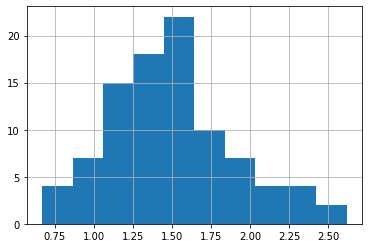

In [ ]:
diet_mb = diet_mb.join(bmldf['TDEE'], how='inner')
# diet_mb['caloric_restriction'] = diet_mb.apply(lambda row: 1 if row['TDEE'] > row['Energy'] else 0, axis=1)
diet_mb['Energy Expenditure / Consumption Ratio'] = diet_mb['TDEE'] / diet_mb['Energy']
diet_mb = diet_mb.drop('TDEE', axis=1)
diet_mb['Energy Expenditure / Consumption Ratio'].hist()

In [ ]:
diet_mb.isnull().sum().sort_values()

Acorn squash                              0
Tofu                                      0
Tofu Pad Thai                             0
Tom Yum soup                              0
Tomato paste                              0
                                         ..
Hummus Salad                              0
Ice cream                                 0
Ice cream bar                             0
Hamburger                                 0
Energy Expenditure / Consumption Ratio    1
Length: 767, dtype: int64

In [ ]:
if stage == 'baseline':
    # Remove features with 0 variability
    cols_to_drop = list(diet_mb.columns[diet_mb.std() == 0])
    diet_mb = diet_mb.drop(cols_to_drop, axis=1)
    cols_to_drop

In [ ]:
diet_mb.isnull().sum().sort_values()

Acorn squash                              0
Toblerone                                 0
Tofu                                      0
Tofu Pad Thai                             0
Tom Yum soup                              0
                                         ..
Hummus                                    0
Hummus Salad                              0
Ice cream                                 0
Hamantaschen                              0
Energy Expenditure / Consumption Ratio    1
Length: 765, dtype: int64

In [ ]:
diet_mb['Energy Expenditure / Consumption Ratio'] = diet_mb['Energy Expenditure / Consumption Ratio'].fillna(diet_mb['Energy Expenditure / Consumption Ratio'].median())


In [ ]:
if stage == '02_00_visit':
    # remove remaining columns
    existing_features = [feature for feature in all_diet_features if feature in diet_mb.columns]
    diet_mb = diet_mb[existing_features]

In [ ]:
if stage == '02_00_visit':
    # Convert diet_mb.columns to a set for comparison
    diet_mb_columns = set(diet_mb.columns)

    # Find differences
    only_in_all_diet_features = set(all_diet_features) - diet_mb_columns
    only_in_diet_mb_columns = diet_mb_columns - set(all_diet_features)

    # Check if there is a mismatch and show the different items
    if only_in_all_diet_features or only_in_diet_mb_columns:
        print("Mismatch between all_diet_features and diet_mb.columns.")
        if only_in_all_diet_features:
            print("Items only in all_diet_features:", only_in_all_diet_features)
        if only_in_diet_mb_columns:
            print("Items only in diet_mb.columns:", only_in_diet_mb_columns)
    else:
        print("Validation successful: all_diet_features contains the same items as diet_mb.columns.")


In [ ]:
if stage == 'baseline':
    if 'Water_nutrient' in diet_mb.columns:
        diet_mb.drop('Water_nutrient', axis=1, inplace=True)


In [ ]:
all_diet_features = list(diet_mb.columns)
all_diet_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [ ]:
# diet_corr = diet_mb[all_diet_features].corr()

# high_corr_pairs = diet_corr[(np.abs(diet_corr) > 0.9)]

# # Step 3: Unstack and filter to get pairs of features with correlation > 0.8
# high_corr_pairs = high_corr_pairs.unstack().dropna()

# # Since the matrix is symmetric, we need to filter out duplicates
# high_corr_pairs = high_corr_pairs[high_corr_pairs.index.get_level_values(0) < high_corr_pairs.index.get_level_values(1)]

# # Display the high correlation pairs
# pd.set_option('display.max_rows', None)
# high_corr_pairs

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
diet_mb.shape

(94, 765)

In [ ]:
if stage == 'baseline':
    diet_mb.to_pickle(f'/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/QC/DYsp/For_tomer/diet_celiac_{study_ids[0]}.pkl')
    with open(f'/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/QC/DYsp/For_tomer/my_lists_diet_{study_ids[0]}.pkl', 'wb') as file:
        pickle.dump([base_features, all_diet_features], file)
if stage == '02_00_visit':
    diet_mb.to_pickle(f'/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/QC/DYsp/For_tomer/diet_features_{study_ids[0]}_02_visit.pkl')

In [ ]:
diet_mb.describe()

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,gender,Energy Expenditure / Consumption Ratio
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.000170,0.000007,0.000720,0.000355,0.001048,0.008379,0.000002,0.009280,0.002098,0.000049,...,0.000392,0.077505,0.005795,0.005629,0.051453,0.004301,0.107627,50.595745,0.361702,1.502212
std,0.000919,0.000071,0.002581,0.002930,0.005333,0.014888,0.000013,0.011904,0.007494,0.000475,...,0.000918,0.043430,0.012056,0.008041,0.041242,0.013409,0.067786,6.609409,0.483070,0.399123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005479,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.668311
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001520,0.000000,0.000000,...,0.000000,0.046508,0.000000,0.000000,0.019552,0.000000,0.062862,45.000000,0.000000,1.230382
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.002022,0.000000,0.005384,0.000000,0.000000,...,0.000000,0.072854,0.000000,0.002342,0.040592,0.000000,0.098067,51.000000,0.000000,1.467258
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.008813,0.000000,0.012430,0.000000,0.000000,...,0.000239,0.092504,0.006095,0.008745,0.073829,0.003265,0.142877,55.000000,1.000000,1.695677
max,0.007810,0.000689,0.017311,0.028176,0.033737,0.090186,0.000091,0.060109,0.056072,0.004601,...,0.005890,0.219783,0.068020,0.054995,0.178757,0.113945,0.410449,67.000000,1.000000,2.618921


In [ ]:
diet_mb.isnull().sum().sort_values()

Acorn squash                              0
Toblerone                                 0
Tofu                                      0
Tofu Pad Thai                             0
Tom Yum soup                              0
                                         ..
Hummus                                    0
Hummus Salad                              0
Ice cream                                 0
Hamantaschen                              0
Energy Expenditure / Consumption Ratio    0
Length: 765, dtype: int64

In [ ]:
diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,gender,Energy Expenditure / Consumption Ratio
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001267,0.002604,0.0,...,0.000134,0.072195,0.068020,0.015531,0.000287,0.000000,0.183166,52.0,0.0,1.070937
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001810,0.000000,0.0,...,0.000000,0.013438,0.000000,0.016893,0.022535,0.000000,0.062833,57.0,1.0,1.467258
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025958,0.000000,0.0,...,0.000000,0.043309,0.000000,0.010833,0.103688,0.000000,0.167635,54.0,0.0,0.678808
10K_1213119006,0.0,0.0,0.004757,0.000000,0.0,0.002151,0.000000,0.000000,0.000000,0.0,...,0.000424,0.082501,0.000000,0.000000,0.178757,0.000000,0.107328,55.0,0.0,2.315620
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,0.010404,0.000000,0.005488,0.000000,0.0,...,0.000000,0.091131,0.000000,0.000000,0.000000,0.000000,0.098473,43.0,0.0,1.577960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.000010,0.000129,0.0,0.009169,0.000008,0.012353,0.002810,0.0,...,0.000000,0.133504,0.009239,0.006208,0.037914,0.002251,0.088973,49.0,1.0,1.174732
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010397,0.000000,0.0,...,0.000000,0.020098,0.000000,0.000977,0.086673,0.000000,0.170092,45.0,1.0,1.471899
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002637,0.000000,0.0,...,0.000000,0.015836,0.000000,0.000000,0.018836,0.000217,0.122600,42.0,1.0,1.362067


### Choose only gluten free diet columns

In [ ]:
yishay_diet = pd.read_pickle(f'/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/QC/DYsp/For_tomer/diet_celiac_{study_ids[0]}.pkl')
yishay_diet

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,Spicesandherbs,Vegetables,bakedgoods,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,gender,Energy Expenditure / Consumption Ratio
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001267,0.002604,0.0,...,0.000134,0.072195,0.068020,0.015531,0.000287,0.000000,0.183166,52.0,0.0,1.070937
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001810,0.000000,0.0,...,0.000000,0.013438,0.000000,0.016893,0.022535,0.000000,0.062833,57.0,1.0,1.467258
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025958,0.000000,0.0,...,0.000000,0.043309,0.000000,0.010833,0.103688,0.000000,0.167635,54.0,0.0,0.678808
10K_1213119006,0.0,0.0,0.004757,0.000000,0.0,0.002151,0.000000,0.000000,0.000000,0.0,...,0.000424,0.082501,0.000000,0.000000,0.178757,0.000000,0.107328,55.0,0.0,2.315620
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,0.010404,0.000000,0.005488,0.000000,0.0,...,0.000000,0.091131,0.000000,0.000000,0.000000,0.000000,0.098473,43.0,0.0,1.577960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.000010,0.000129,0.0,0.009169,0.000008,0.012353,0.002810,0.0,...,0.000000,0.133504,0.009239,0.006208,0.037914,0.002251,0.088973,49.0,1.0,1.174732
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010397,0.000000,0.0,...,0.000000,0.020098,0.000000,0.000977,0.086673,0.000000,0.170092,45.0,1.0,1.471899
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002637,0.000000,0.0,...,0.000000,0.015836,0.000000,0.000000,0.018836,0.000217,0.122600,42.0,1.0,1.362067


In [ ]:
gluten_containing_foods = [
    'Bagel', 'Baguette', 'Bread', 'Bread Crumbs', 'Brioche', 'Cake', 'Brownies', 'Cookies', 'Cookies Oreo',
    'Croissant', 'Crackers', 'Baklava', 'Burekas', 'Rugelach', 'Empanadas', 'Hamantaschen',
    'Lasagna', 'Noodles', 'Egg noodles', 'Pasta', 'Ravioli', 'Israeli couscous', 'Couscous', 'Cheesecake',
    'Chocolate cake', 'Pancake', 'Tiramisu', 'Spongecake', 'Pizza', 'Pretzels', 'Schnitzel', 'Soup mandels',
    'Pita', 'Roll', 'Tortilla', 'Danish', 'Gnocchi', 'Bulgur', 'Barley soup', 'Wheat',
    'Croutons', 'Onion Rings', 'Fried Bread', 'Beer', 'Malt beverage', 'Soy sauce', 'Spelled', 'Avocado Sandwich', 'Tuna Sandwich', 'Egg Sandwich',
    'Salmon Sandwich', 'Sabih Sandwich', 'Yellow Cheese Sandwich', 'Teami waffle snack', 'Omelet sandwich', 'Wholemeal Baguette',
    'Wholemeal Bread',
    'Wholemeal Crackers',
    'Wholemeal Light Bread',
    'Wholemeal Pita',
    'Wholemeal Roll',
]


In [ ]:
list(yishay_diet.columns)

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

In [ ]:
yishay_diet_filtered = yishay_diet[gluten_containing_foods]
yishay_diet_filtered

,Bagel,Baguette,Bread,Bread Crumbs,Brioche,Cake,Brownies,Cookies,Cookies Oreo,Croissant,...,Sabih Sandwich,Yellow Cheese Sandwich,Teami waffle snack,Omelet sandwich,Wholemeal Baguette,Wholemeal Bread,Wholemeal Crackers,Wholemeal Light Bread,Wholemeal Pita,Wholemeal Roll
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.016289,0.000000,0.038306,0.0,0.008513,0.0,0.001252,0.029641,0.000000,0.000000,...,0.000000,0.000000,0.002738,0.006774,0.000000,0.000000,0.000000,0.0,0.0,0.005706
10K_1197934845,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.013778,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
10K_1210197986,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.002172,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
10K_1213119006,0.000000,0.000000,0.002462,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008732,0.000000,0.0,0.0,0.000000
10K_1280653108,0.000000,0.000000,0.050618,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.001264,0.003395,0.006628,0.0,0.000316,0.0,0.000048,0.005743,0.000000,0.014255,...,0.000529,0.000639,0.000615,0.000889,0.009968,0.003418,0.002148,0.0,0.0,0.001604
10K_9703851292,0.000000,0.004306,0.019594,0.0,0.000000,0.0,0.000000,0.000000,0.024168,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
10K_9790043612,0.000000,0.028333,0.027572,0.0,0.000000,0.0,0.000000,0.000000,0.036781,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
def add_class_to_yishay_diet(yishay_diet):
    # Reset index to allow merging on RegistrationCode
    yishay_diet = yishay_diet.reset_index()
    
    # Merge with yishay dataframe to add the 'Class' column
    yishay_diet = yishay_diet.merge(yishay[['RegistrationCode', 'Class']], on='RegistrationCode', how='left')
    
    # Set the index back to original
    yishay_diet = yishay_diet.set_index(['RegistrationCode'])  # Assuming the original index has 'RegistrationCode' and 'Day'
    
    return yishay_diet

# Apply the function
yishay_diet = add_class_to_yishay_diet(yishay_diet)
yishay_diet_filtered = add_class_to_yishay_diet(yishay_diet_filtered)
yishay_diet_filtered

,Bagel,Baguette,Bread,Bread Crumbs,Brioche,Cake,Brownies,Cookies,Cookies Oreo,Croissant,...,Yellow Cheese Sandwich,Teami waffle snack,Omelet sandwich,Wholemeal Baguette,Wholemeal Bread,Wholemeal Crackers,Wholemeal Light Bread,Wholemeal Pita,Wholemeal Roll,Class
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.016289,0.000000,0.038306,0.0,0.008513,0.0,0.001252,0.029641,0.000000,0.000000,...,0.000000,0.002738,0.006774,0.000000,0.000000,0.000000,0.0,0.0,0.005706,Control
10K_1197934845,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.013778,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Celiac
10K_1210197986,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.002172,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Celiac
10K_1213119006,0.000000,0.000000,0.002462,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.008732,0.000000,0.0,0.0,0.000000,Celiac
10K_1280653108,0.000000,0.000000,0.050618,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.001264,0.003395,0.006628,0.0,0.000316,0.0,0.000048,0.005743,0.000000,0.014255,...,0.000639,0.000615,0.000889,0.009968,0.003418,0.002148,0.0,0.0,0.001604,Control
10K_9703851292,0.000000,0.004306,0.019594,0.0,0.000000,0.0,0.000000,0.000000,0.024168,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Control
10K_9790043612,0.000000,0.028333,0.027572,0.0,0.000000,0.0,0.000000,0.000000,0.036781,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,Control


In [ ]:
def filter_yishay_diet(yishay_diet):
    celiac_diet = yishay_diet[yishay_diet['Class'] == 'Celiac']

    non_zero_columns = celiac_diet.loc[:, (celiac_diet != 0).any(axis=0)]
    all_zero_columns = celiac_diet.loc[:, (celiac_diet == 0).all(axis=0)]

    return all_zero_columns, non_zero_columns

zero_foods, non_zero_foods = filter_yishay_diet(yishay_diet_filtered)
zero_foods

,Bread Crumbs,Brioche,Cake,Baklava,Empanadas,Hamantaschen,Egg noodles,Ravioli,Pretzels,Soup mandels,...,Fried Bread,Malt beverage,Avocado Sandwich,Tuna Sandwich,Sabih Sandwich,Omelet sandwich,Wholemeal Baguette,Wholemeal Light Bread,Wholemeal Pita,Wholemeal Roll
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1197934845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1210197986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1213119006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1455701032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_1855563990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_2148452243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_3694628005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_3985208029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10K_4191431470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(non_zero_foods.columns)
print(zero_foods.columns)

Index(['Bagel', 'Baguette', 'Bread', 'Brownies', 'Cookies', 'Cookies Oreo',
       'Croissant', 'Crackers', 'Burekas', 'Rugelach', 'Lasagna', 'Noodles',
       'Pasta', 'Israeli couscous', 'Couscous', 'Cheesecake', 'Chocolate cake',
       'Pancake', 'Tiramisu', 'Spongecake', 'Pizza', 'Schnitzel', 'Pita',
       'Roll', 'Tortilla', 'Danish', 'Gnocchi', 'Bulgur', 'Onion Rings',
       'Beer', 'Soy sauce', 'Spelled', 'Egg Sandwich', 'Salmon Sandwich',
       'Yellow Cheese Sandwich', 'Teami waffle snack', 'Wholemeal Bread',
       'Wholemeal Crackers', 'Class'],
      dtype='object')
Index(['Bread Crumbs', 'Brioche', 'Cake', 'Baklava', 'Empanadas',
       'Hamantaschen', 'Egg noodles', 'Ravioli', 'Pretzels', 'Soup mandels',
       'Barley soup', 'Wheat', 'Croutons', 'Fried Bread', 'Malt beverage',
       'Avocado Sandwich', 'Tuna Sandwich', 'Sabih Sandwich',
       'Omelet sandwich', 'Wholemeal Baguette', 'Wholemeal Light Bread',
       'Wholemeal Pita', 'Wholemeal Roll'],
      dtype='o

In [ ]:
yishay_diet['gluten_free_score'] = yishay_diet[zero_foods.columns].sum(axis=1)
yishay_diet['gluten_free_score_categories'] = yishay_diet[['Bread_cat', 'Bread_wholewheat']].sum(axis=1)
yishay_diet['gluten_free_score_all_gluten_foods'] = yishay_diet[list(zero_foods.columns) + list(non_zero_foods.columns)].sum(axis=1)

In [ ]:
foods_in_category('Bread')
foods_in_category('Bread_wholewheat')

['Roll' 'Croutons' 'Bread' 'Sweet Roll' 'Brioche' 'Pizza' 'Olive Bread'
 'Ciabatta' 'Pita' 'Bagel' 'Omelet sandwich' 'Gluten free bread'
 'Rice crackers' 'Buckwheat crackers' 'Wholemeal Bread' 'Sweet Challah'
 'Challah' 'Tortilla' 'emmer wheat bread' 'Baguette' 'Sabih Sandwich'
 'Salmon Sandwich' 'Granola' 'Wholemeal Crackers' 'Light Bread'
 'Sweet Potato Pie' 'Mushroom Pie' 'Crackers' 'Onion Pie' 'Cracker'
 'Corn crackers' 'Bread Crumbs' 'Burekas' 'Spinach Quiche' 'Knaidlach'
 'Sambusak' 'Empanadas' 'Tuna Sandwich' 'Wholemeal Light Bread'
 'Tahini Bread' 'Matzo' 'Fried Bread' 'Yellow Cheese Sandwich'
 'Avocado Sandwich' 'Cuba' 'Meat Ravioli' 'Rye Bread']
['Wholemeal Roll' 'Buckwheat Bread' 'Wholemeal Bread' 'emmer wheat bread'
 'Rye Bread' 'Omelet sandwich' 'Wholemeal Baguette' 'Rice crackers'
 'Wholemeal Pita' 'Pita' 'Wholemeal Crackers' 'Tortilla'
 'Wholemeal Light Bread' 'Gluten free bread']


<AxesSubplot:>

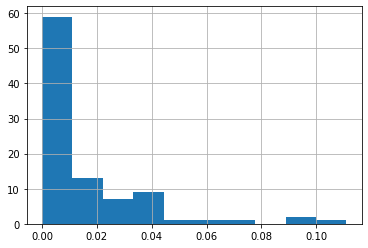

In [ ]:
yishay_diet['gluten_free_score'].hist()

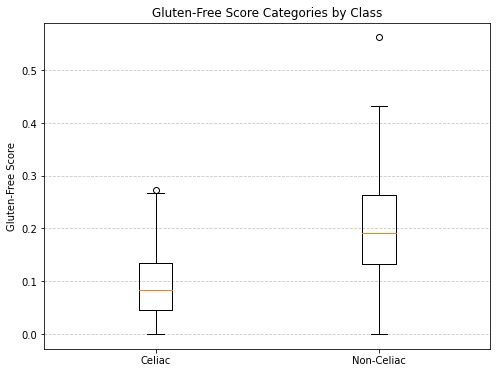

In [ ]:
import matplotlib.pyplot as plt

# Extract data for Celiac and non-Celiac groups
celiac_data = yishay_diet[yishay_diet['Class'] == 'Celiac']['gluten_free_score_all_gluten_foods']
non_celiac_data = yishay_diet[yishay_diet['Class'] != 'Celiac']['gluten_free_score_all_gluten_foods']

# Create boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([celiac_data.dropna(), non_celiac_data.dropna()], labels=['Celiac', 'Non-Celiac'])

# Set plot title and labels
plt.title('Gluten-Free Score Categories by Class')
plt.ylabel('Gluten-Free Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [ ]:
yishay_diet

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,fruitjuicesandsoftdrinks,milkcreamcheeseandyogurts,sweetmilkproducts,sweets,age,gender,Energy Expenditure / Consumption Ratio,Class,gluten_free_score,gluten_free_score_categories
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1060368979,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001267,0.002604,0.0,...,0.015531,0.000287,0.000000,0.183166,52.0,0.0,1.070937,Control,0.036602,0.253680
10K_1197934845,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001810,0.000000,0.0,...,0.016893,0.022535,0.000000,0.062833,57.0,1.0,1.467258,Celiac,0.000000,0.359818
10K_1210197986,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.025958,0.000000,0.0,...,0.010833,0.103688,0.000000,0.167635,54.0,0.0,0.678808,Celiac,0.000000,0.215150
10K_1213119006,0.0,0.0,0.004757,0.000000,0.0,0.002151,0.000000,0.000000,0.000000,0.0,...,0.000000,0.178757,0.000000,0.107328,55.0,0.0,2.315620,Celiac,0.000000,0.091238
10K_1280653108,0.0,0.0,0.000000,0.000000,0.0,0.010404,0.000000,0.005488,0.000000,0.0,...,0.000000,0.000000,0.000000,0.098473,43.0,0.0,1.577960,Control,0.000000,0.292165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9696484969,0.0,0.0,0.000010,0.000129,0.0,0.009169,0.000008,0.012353,0.002810,0.0,...,0.006208,0.037914,0.002251,0.088973,49.0,1.0,1.174732,Control,0.042511,0.253318
10K_9703851292,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.010397,0.000000,0.0,...,0.000977,0.086673,0.000000,0.170092,45.0,1.0,1.471899,Control,0.000000,0.319744
10K_9790043612,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.002637,0.000000,0.0,...,0.000000,0.018836,0.000217,0.122600,42.0,1.0,1.362067,Control,0.094552,0.410601


In [ ]:
yishay_diet.to_pickle(f'/net/mraid20/ifs/wisdom/segal_lab/genie/LabData/QC/DYsp/For_tomer/diet_celiac_{study_ids[0]}.pkl')